In [1]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
train_df = pd.read_csv('heart-train.csv')


In [3]:
train_df.head()

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0  134    13.60  3.50      27.78  Present     60    25.99    57.34   49    1
1  132     6.20  6.47      36.21  Present     62    30.77    14.14   45    0
2  142     4.05  3.38      16.20   Absent     59    20.81     2.62   38    0
3  114     4.08  4.59      14.60  Present     62    23.11     6.72   58    1
4  114     0.00  3.83      19.40  Present     49    24.86     2.49   29    0

# 1. Identify the dataset columns into nominal, categorical, continuous, etc. categories.

In [4]:
print("\n Nominal columns in the data are : \n")
print(list( train_df.select_dtypes(include=['object', 'category']).columns)[:], list(train_df.select_dtypes(include='number').columns)[-1:] )

print("\n Categorical columns in the data are : \n")
print(list(train_df.select_dtypes(exclude='number').columns)[:], list(train_df.select_dtypes(include='number').columns)[-1:] )

print("\n Continuous columns in the data are : \n")
print(list(train_df.select_dtypes(include='number').columns)[:-1])


 Nominal columns in the data are : 

['famhist'] ['chd']

 Categorical columns in the data are : 

['famhist'] ['chd']

 Continuous columns in the data are : 

['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']


# 2. Present insights about the data

/var/folders/hg/xl49zs1n58q818kb1pjzhkg80000gn/T/ipykernel_66206/3542972488.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(ax=axes[1], color='skyblue', edgecolor='black', alpha=0.7)


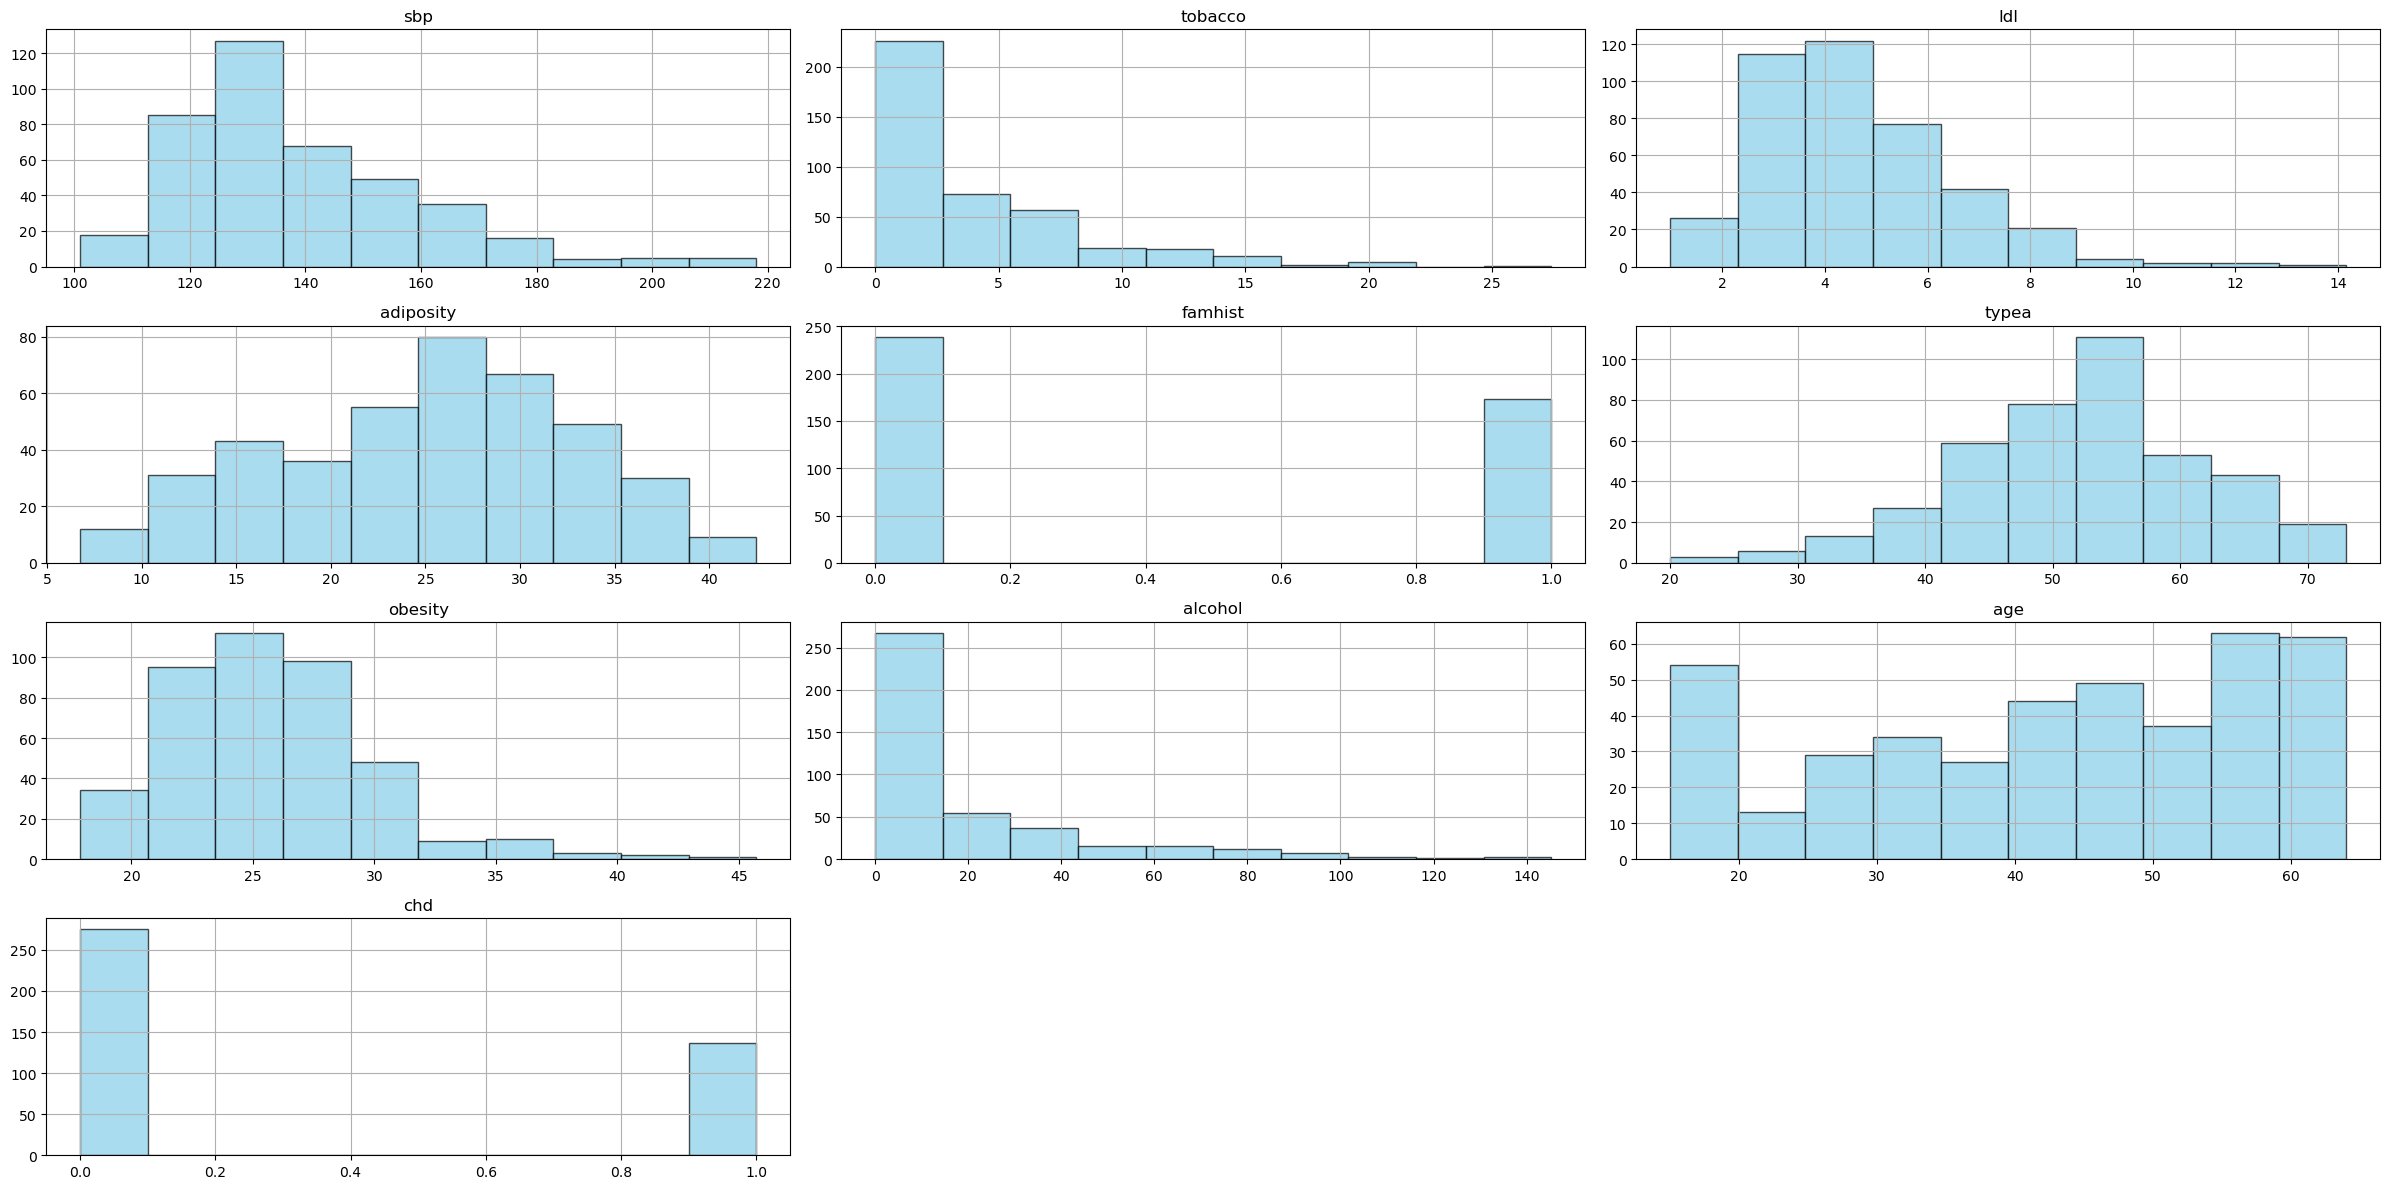

In [5]:

train_df['famhist'] = train_df['famhist'].map({'Present': 1, 'Absent': 0})


summary_stats = train_df.describe()

fig, axes = plt.subplots(1, 2, figsize=(24, 12))

axes[0].axis('off')  # Turn off axis
axes[0].text(0.1, 0.9, "Summary Statistics", fontsize=14, ha='center')
axes[0].table(cellText=summary_stats.values, colLabels=summary_stats.columns, loc='center')

axes[1].set_title("Histograms")
train_df.hist(ax=axes[1], color='skyblue', edgecolor='black', alpha=0.7)

for i, col in enumerate(train_df.columns):
    axes[1].get_children()[i].set_label(col)  # Set x-axis labels

plt.tight_layout()

plt.show()


In [6]:
train_df.describe()

sbp     tobacco         ldl   adiposity     famhist       typea  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean   139.240291    3.666262    4.589539   25.151214    0.419903   52.135922   
std     20.451903    4.518501    1.883744    7.740794    0.494143    9.592727   
min    101.000000    0.000000    0.980000    6.740000    0.000000   20.000000   
25%    125.500000    0.037500    3.240000   19.397500    0.000000   46.000000   
50%    136.000000    1.805000    4.225000   26.090000    0.000000   52.000000   
75%    148.000000    5.850000    5.527500   30.755000    1.000000   58.000000   
max    218.000000   27.400000   14.160000   42.490000    1.000000   73.000000   

          obesity     alcohol         age         chd  
count  412.000000  412.000000  412.000000  412.000000  
mean    25.802112   18.030073   42.686893    0.332524  
std      4.081745   25.298909   15.129338    0.471690  
min     17.890000    0.000000   15.000000    0.000000  
25%     22.737500    0.447500   30.750000    0.000000  
50%     25.635000    7.510000   45.000000    0.000000  
75%     28.167500   24.960000   57.000000    1.000000  
max     45.720000  145.290000   64.000000    1.000000

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    int64  
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 32.3 KB


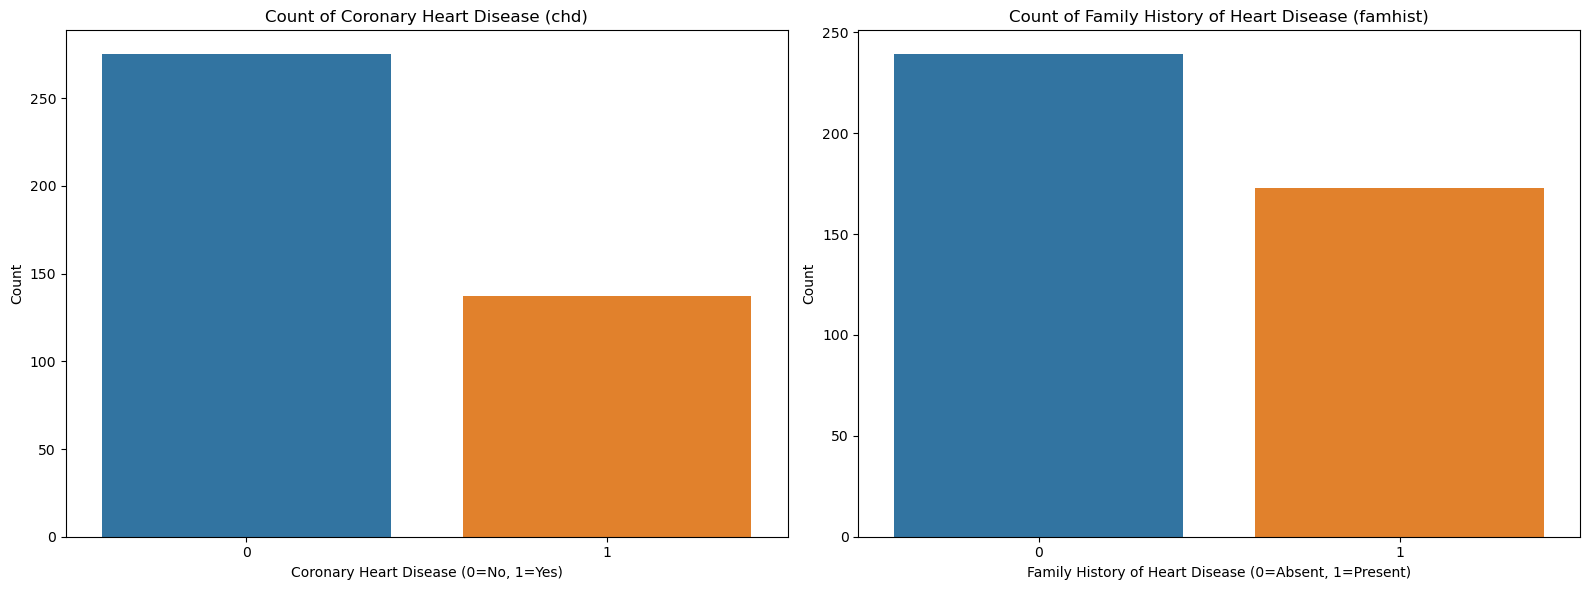

In [8]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot for 'chd'
sns.countplot(data=train_df, x='chd', ax=axes[0])
axes[0].set_title('Count of Coronary Heart Disease (chd)')
axes[0].set_xlabel('Coronary Heart Disease (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

# Plot for 'famhist'
sns.countplot(data=train_df, x='famhist', ax=axes[1])
axes[1].set_title('Count of Family History of Heart Disease (famhist)')
axes[1].set_xlabel('Family History of Heart Disease (0=Absent, 1=Present)')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()


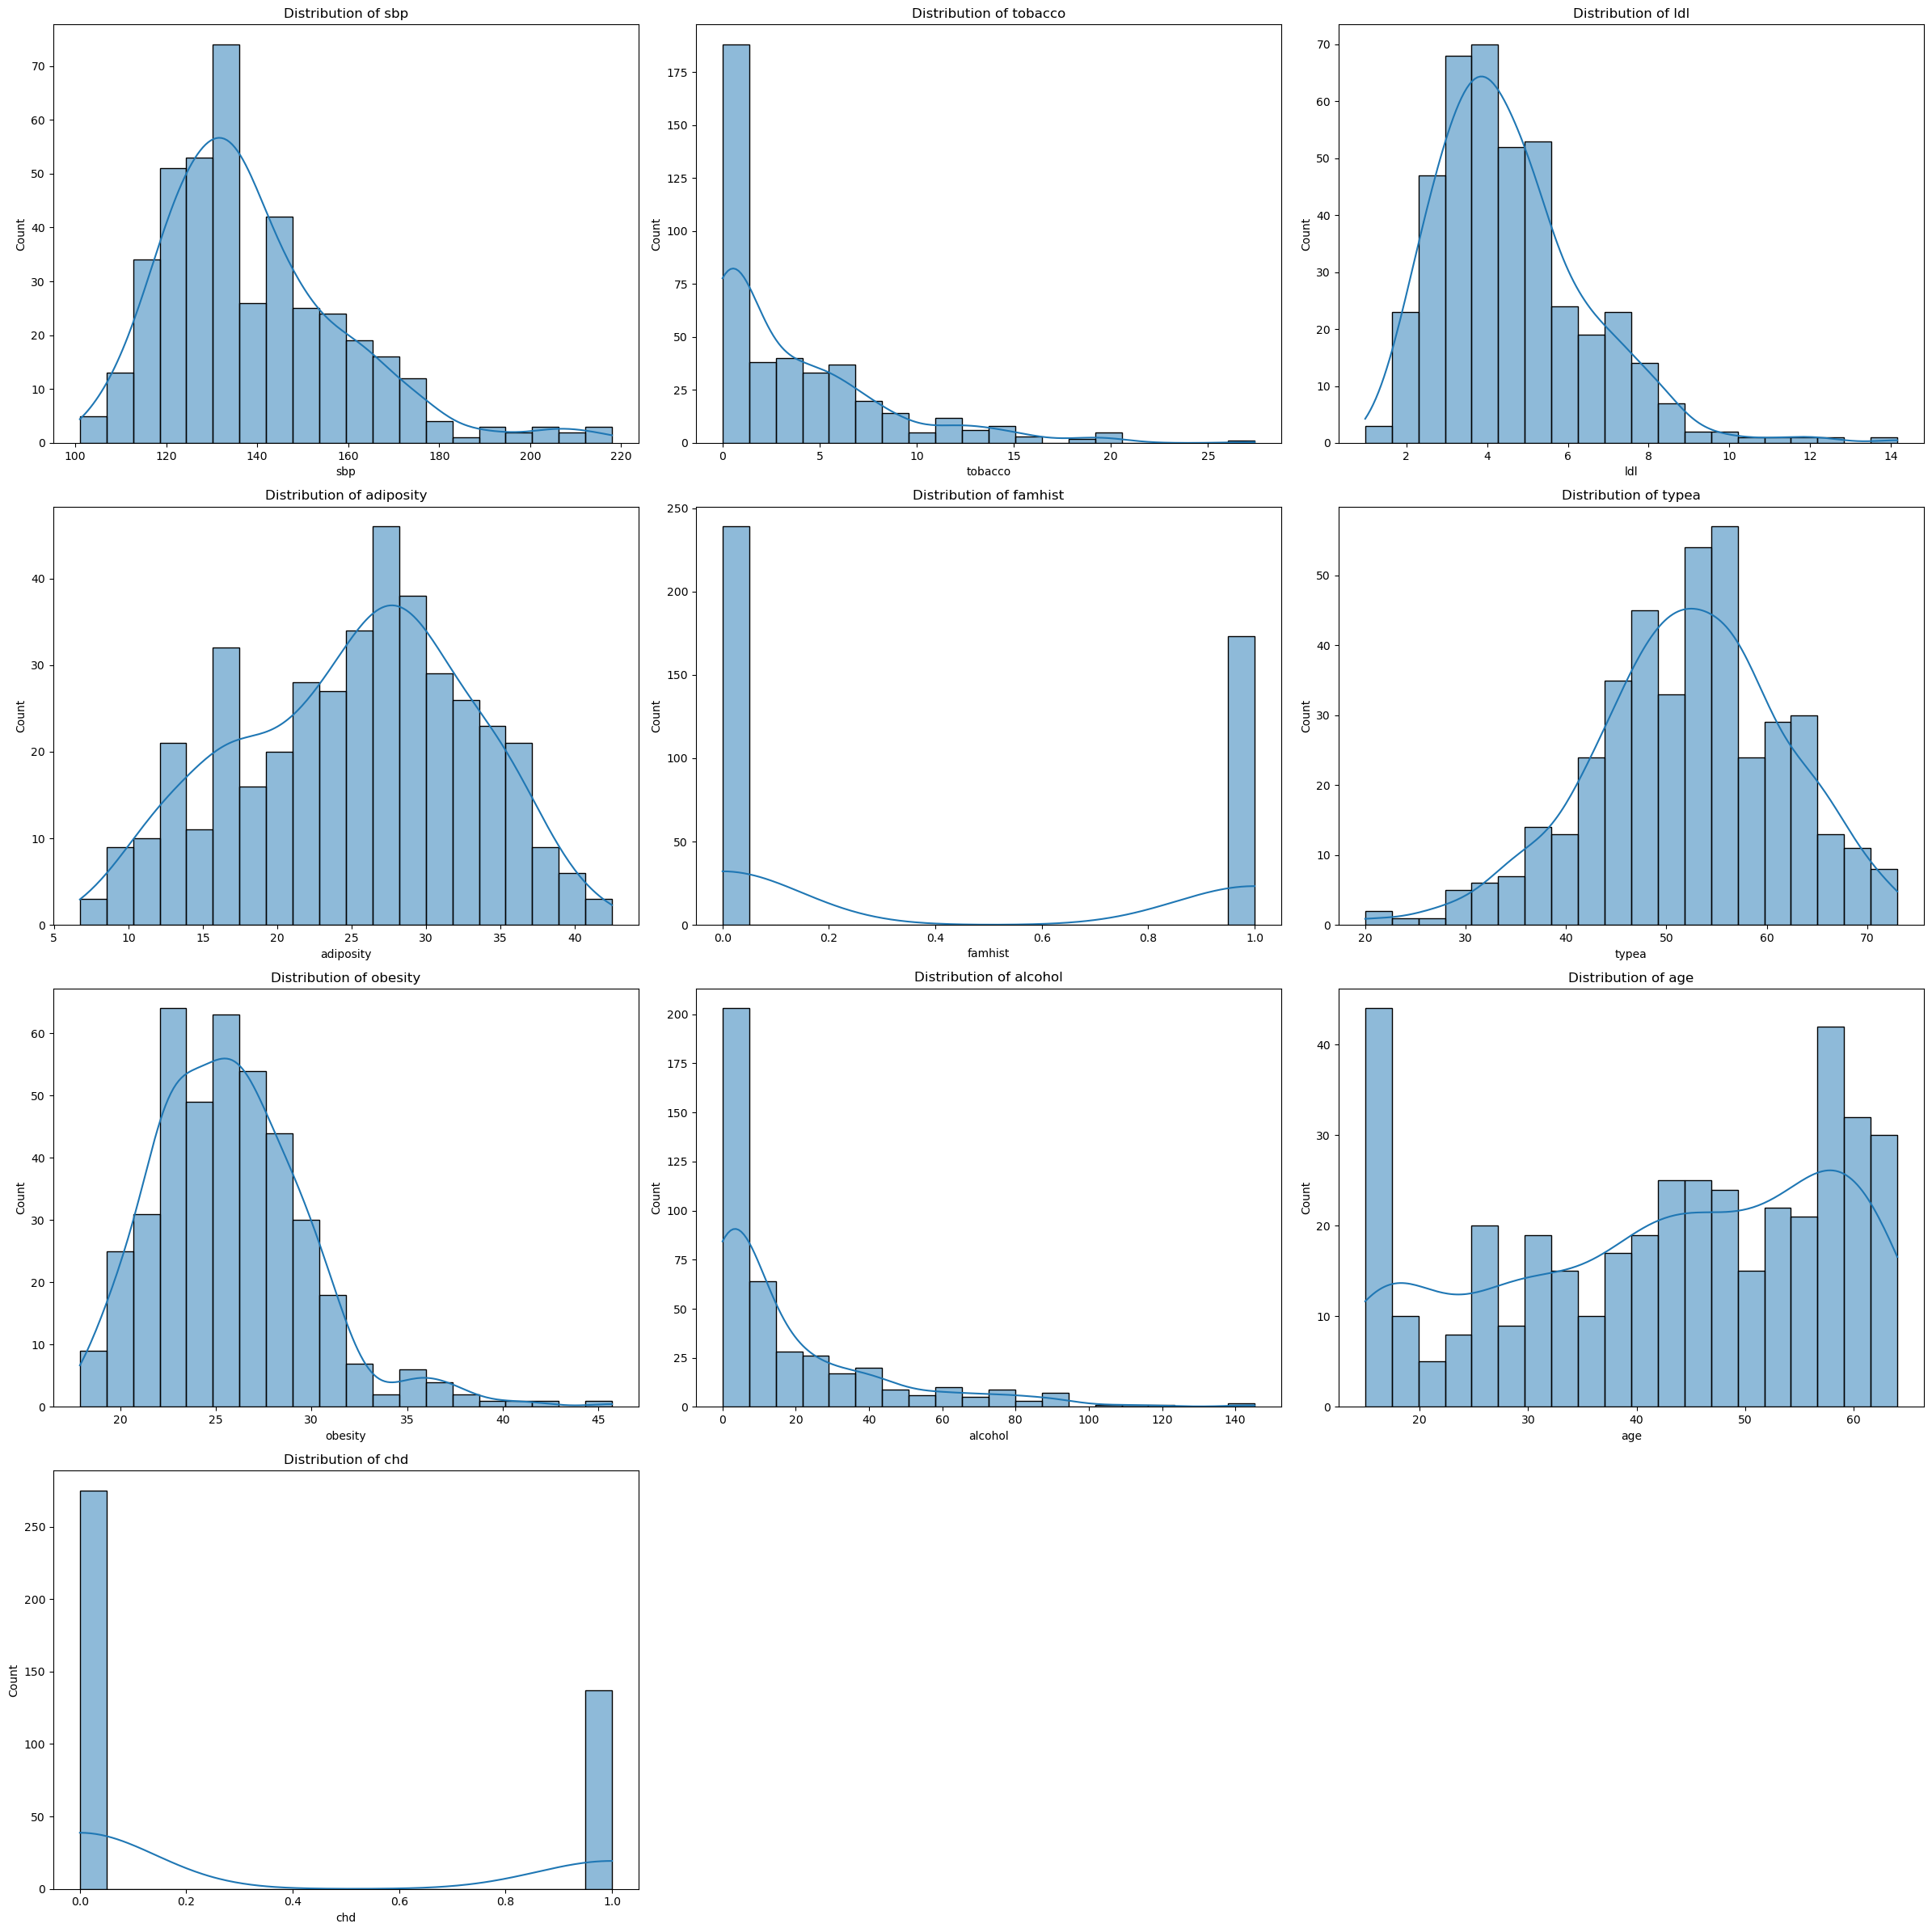

In [9]:

import math

# List of columns to plot
columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']

# Calculate the number of rows and columns for the subplot grid
n = len(columns)
rows = math.ceil(math.sqrt(n))
cols = math.ceil(n / rows)

fig, axs = plt.subplots(rows, cols, figsize=(8*cols, 6*rows))

# Flatten the axes array and iterate over it and the columns together
for ax, col in zip(axs.flatten(), columns):
    sns.histplot(train_df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any unused subplots
for ax in axs.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()


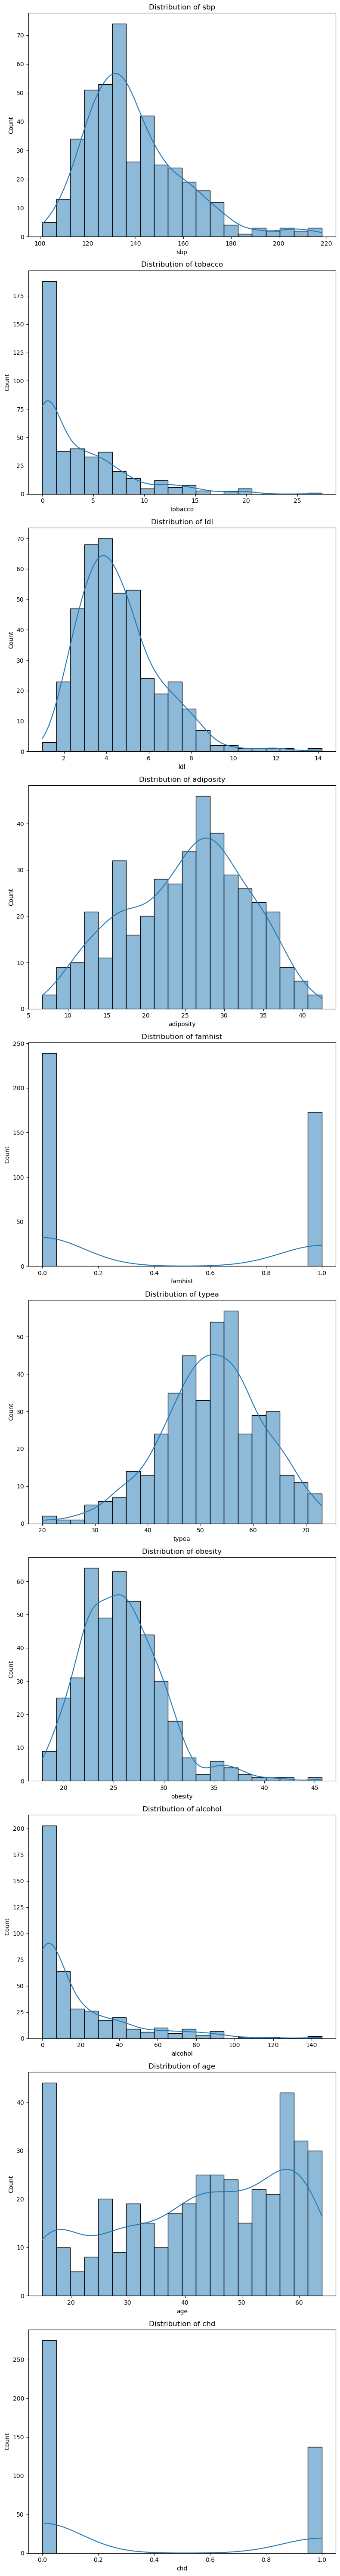

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']

# Calculate the number of rows and columns for the subplot grid
rows = len(columns)
cols = 1

fig, axs = plt.subplots(rows, cols, figsize=(8, 6*rows))

for i, col in enumerate(columns):
    sns.histplot(train_df[col], bins=20, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


# 3. Find the number of null values for each column.

In [11]:
### if null values exists in data

train_df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [12]:
### if any 0 values exists in data

train_df[train_df == 0].count()

sbp            0
tobacco      101
ldl            0
adiposity      0
famhist      239
typea          0
obesity        0
alcohol      101
age            0
chd          275
dtype: int64

## Select columns to check out the graph

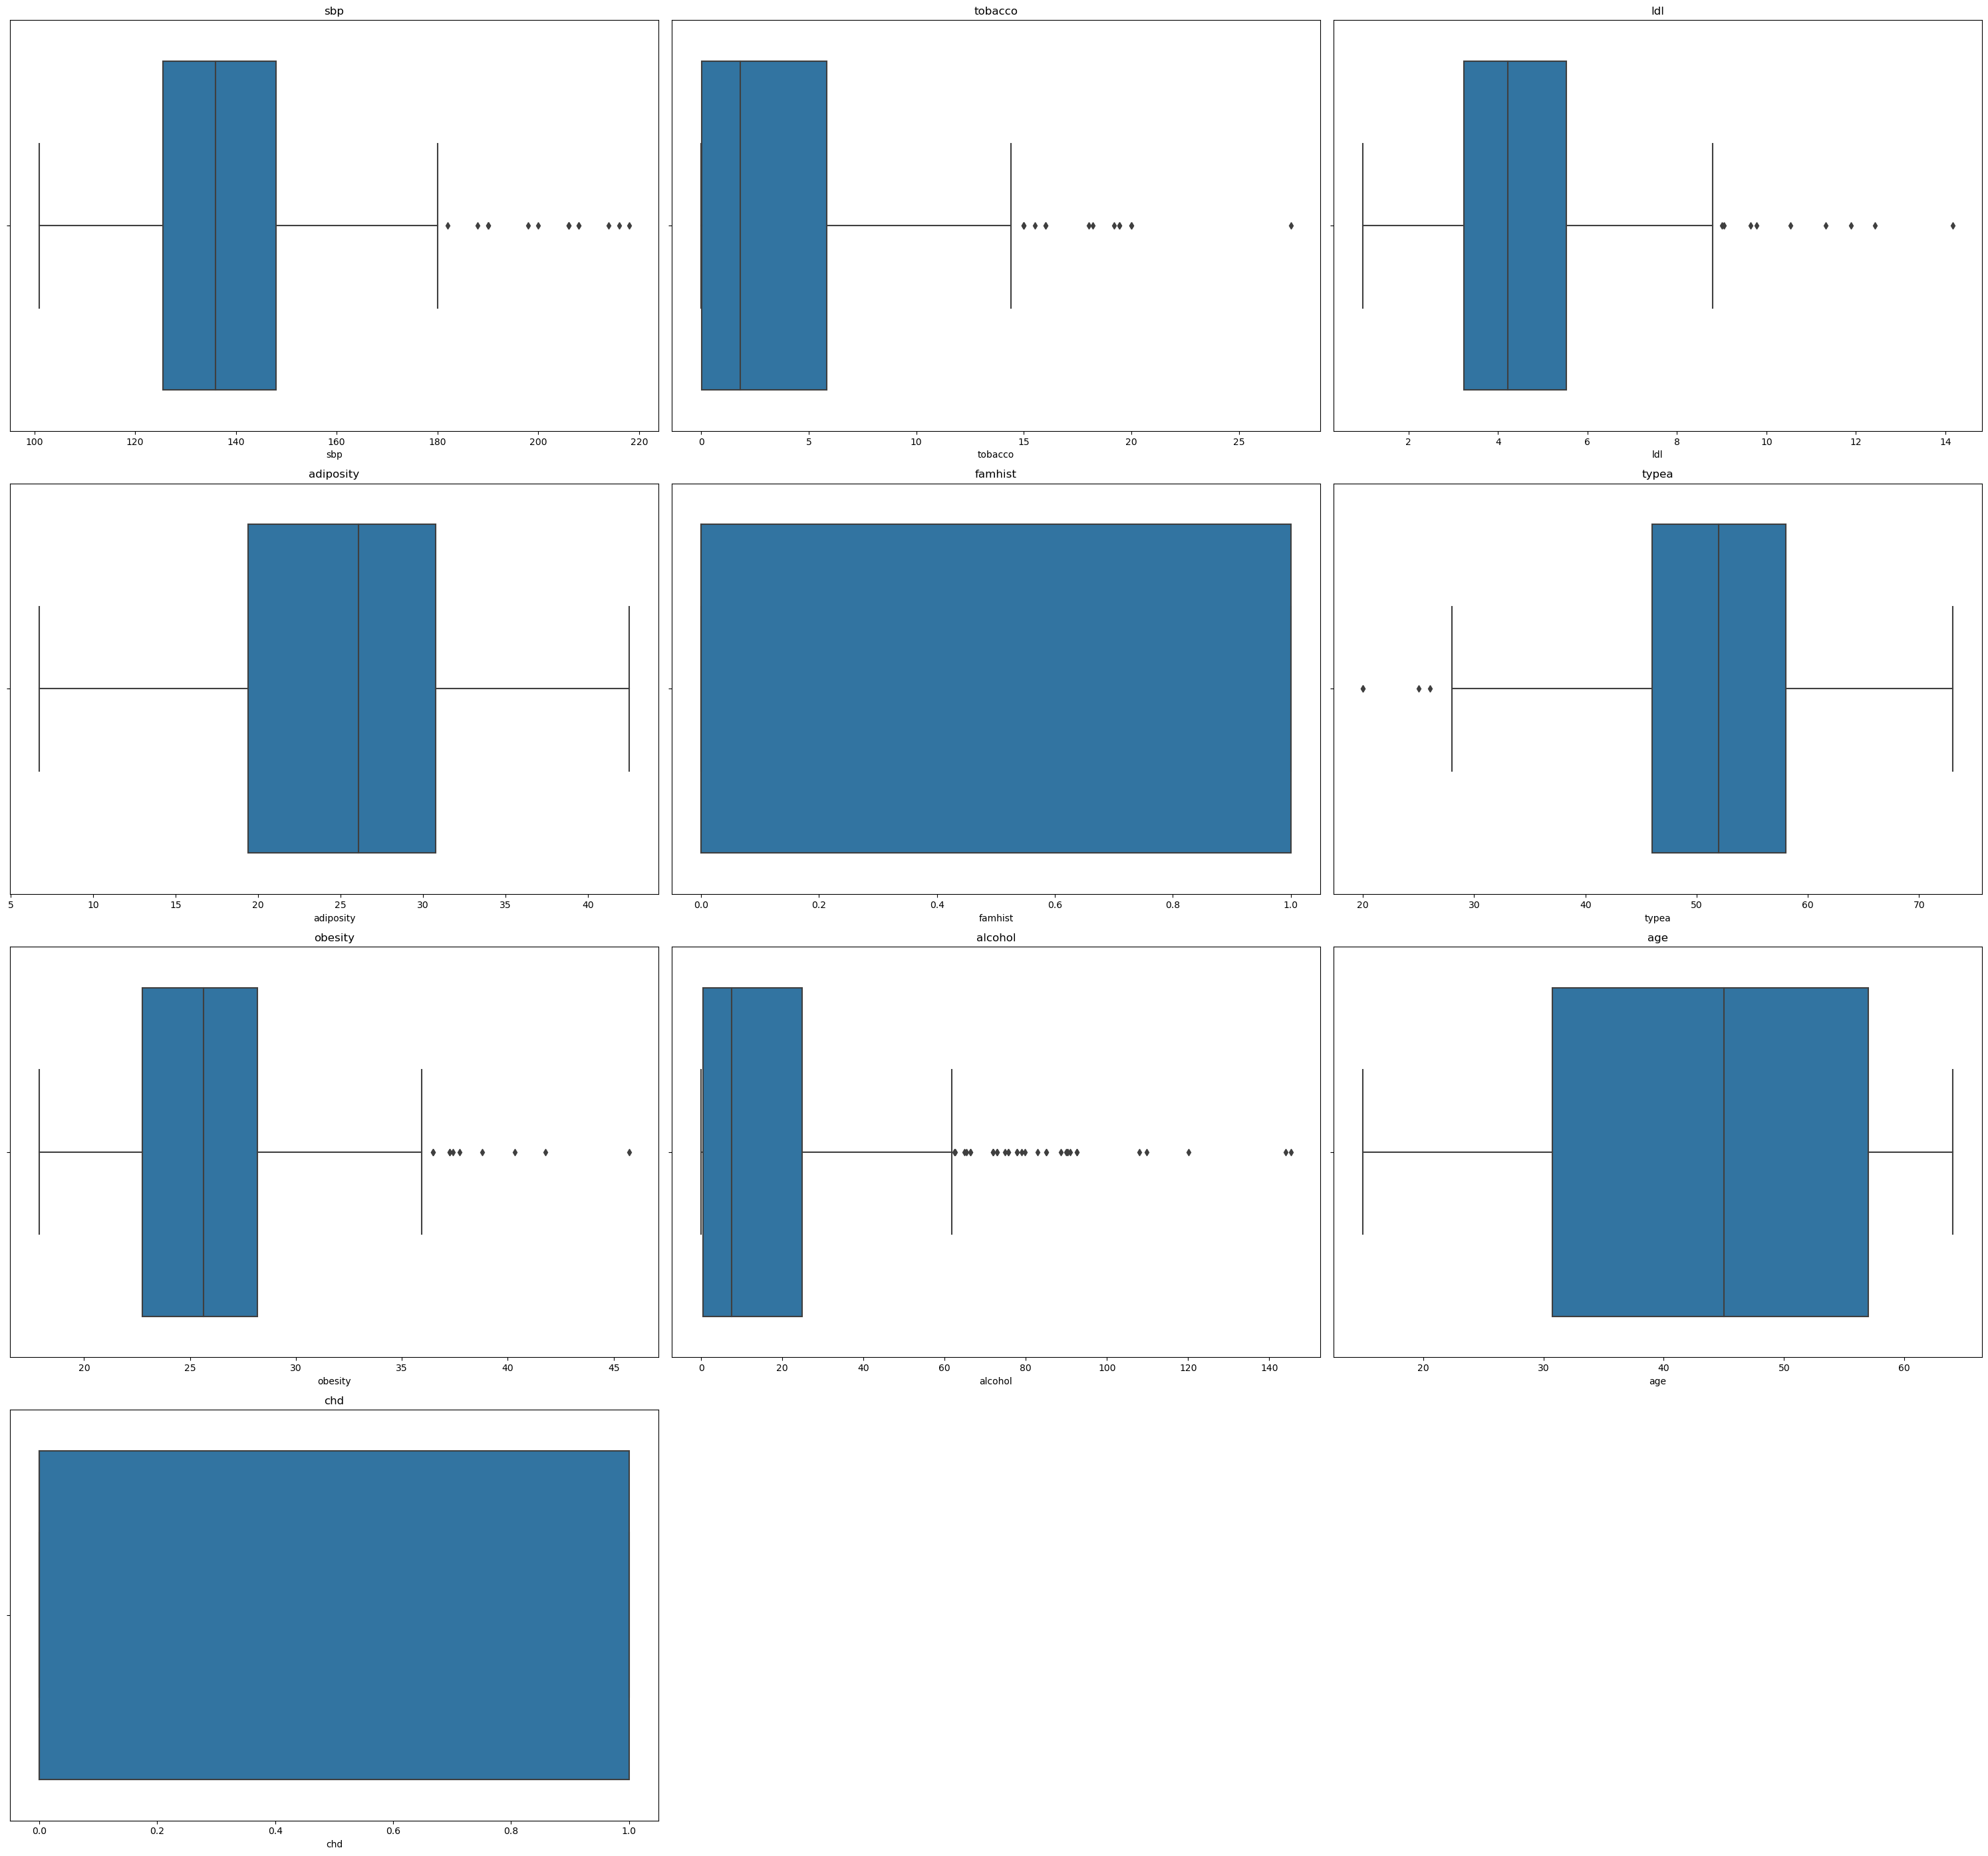

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_cols = train_df.select_dtypes(include='number').columns
n = len(num_cols)

# Calculate the number of rows and columns for the subplot grid
rows = math.ceil(math.sqrt(n))
cols = math.ceil(n / rows)

fig, axs = plt.subplots(rows, cols, figsize=(10*cols, 7*rows))

# Flatten the axes array and iterate over it and the columns together
for ax, col in zip(axs.flatten(), num_cols):
    sns.boxplot(x=train_df[col], ax=ax, orient='h')
    ax.set_title(col)

# Remove any unused subplots
for ax in axs.flatten()[n:]:
    ax.remove()

plt.tight_layout()
plt.show()


# 4. Know about the patients:

In [14]:
# Assuming you have a DataFrame named 'train_df' with an 'age' column

# a. Find the oldest person
oldest_person = train_df['age'].max()
print(f"The oldest person is {oldest_person} years old.")

# b. Find the youngest person
youngest_person = train_df['age'].min()
print(f"The youngest person is {youngest_person} years old.")

# c. Find the average age group
average_age = train_df['age'].mean()
print(f"The average age in the group is approximately {round(average_age)} years old.")

# d. Find median age
median_age = train_df['age'].median()
print(f"The median age is {median_age} years old.")


The oldest person is 64 years old.
The youngest person is 15 years old.
The average age in the group is approximately 43 years old.
The median age is 45.0 years old.


In [15]:
# e. Find the relationship between the deaths and ages (the class column is your prediction variable)

from scipy.stats import pointbiserialr

# Calculate the correlation between age and deaths
correlation, p_value = pointbiserialr(train_df['age'], train_df['chd'])
print(f"Correlation between age and deaths: {correlation}")


Correlation between age and deaths: 0.373637403292748


# this indicates a mild +ve relationship

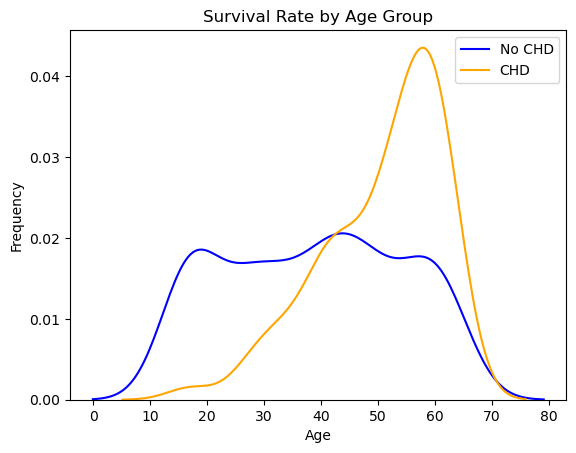

In [16]:
# f. Find the age groups whose survival rate is the largest

sns.kdeplot(train_df[train_df['chd'] == 0]['age'], color="blue", label='No CHD')
sns.kdeplot(train_df[train_df['chd'] == 1]['age'],  color="orange", label='CHD')
# Customize the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survival Rate by Age Group')
plt.legend()
plt.show()


In [17]:
# age of people who are still alive
ana_df = train_df.copy()
survival_rate = train_df.groupby('age')['chd'].mean()
print(survival_rate.idxmin())


15


In [18]:
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['10-20','20-30', '30-40', '40-50', '50-60', '60-70']

# Create a new column 'age_group' based on the age bins
ana_df['age_group'] = pd.cut(ana_df['age'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('age_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('survial rate is largest for : ', survial_rate_largest)

survial rate is largest for :  10-20


# g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction

In [19]:

ana_df.describe()

sbp     tobacco         ldl   adiposity     famhist       typea  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean   139.240291    3.666262    4.589539   25.151214    0.419903   52.135922   
std     20.451903    4.518501    1.883744    7.740794    0.494143    9.592727   
min    101.000000    0.000000    0.980000    6.740000    0.000000   20.000000   
25%    125.500000    0.037500    3.240000   19.397500    0.000000   46.000000   
50%    136.000000    1.805000    4.225000   26.090000    0.000000   52.000000   
75%    148.000000    5.850000    5.527500   30.755000    1.000000   58.000000   
max    218.000000   27.400000   14.160000   42.490000    1.000000   73.000000   

          obesity     alcohol         age         chd  
count  412.000000  412.000000  412.000000  412.000000  
mean    25.802112   18.030073   42.686893    0.332524  
std      4.081745   25.298909   15.129338    0.471690  
min     17.890000    0.000000   15.000000    0.000000  
25%     22.737500    0.447500   30.750000    0.000000  
50%     25.635000    7.510000   45.000000    0.000000  
75%     28.167500   24.960000   57.000000    1.000000  
max     45.720000  145.290000   64.000000    1.000000

In [20]:
start = round(ana_df['sbp'].min()-1)
end = round(ana_df['sbp'].max()+1) 

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['sbp_group'] = pd.cut(ana_df['sbp'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('sbp_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max sbp : ', ana_df['sbp'].max())
print('Min sbp : ', ana_df['sbp'].min())
print('survial rate for sbp group is largest for : ', survial_rate_largest)

Max sbp :  218
Min sbp :  101
survial rate for sbp group is largest for :  111.9 - 123.8


In [21]:
start = round(ana_df['adiposity'].min()-1)
end = round(ana_df['adiposity'].max()+1) 

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['adiposity_group'] = pd.cut(ana_df['adiposity'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('adiposity_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max adiposity : ', ana_df['adiposity'].max())
print('Min adiposity : ', ana_df['adiposity'].min())
print('survial rate for adiposity group is largest for : ', survial_rate_largest)

Max adiposity :  42.49
Min adiposity :  6.74
survial rate for adiposity group is largest for :  6.0 - 9.7


In [22]:
start = round(ana_df['tobacco'].min() )
end = round(ana_df['tobacco'].max()+ 1)

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['tobacco_group'] = pd.cut(ana_df['tobacco'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('tobacco_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max tobacco : ', ana_df['tobacco'].max())
print('Min tobacco : ', ana_df['tobacco'].min())
print('survial rate for tobacco group is largest for : ', survial_rate_largest)

Max tobacco :  27.4
Min tobacco :  0.0
survial rate for tobacco group is largest for :  0.0 - 2.8


In [23]:
start = round(ana_df['typea'].min() )
end = round(ana_df['typea'].max()+ 1)

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['typea_group'] = pd.cut(ana_df['typea'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('typea_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max typea : ', ana_df['typea'].max())
print('Min typea : ', ana_df['typea'].min())
print('survial rate for typea group is largest for : ', survial_rate_largest)

Max typea :  73
Min typea :  20
survial rate for typea group is largest for :  20.0 - 25.4


In [24]:
start = round(ana_df['ldl'].min() - 1)
end = round(ana_df['ldl'].max()+ 1)

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['ldl_group'] = pd.cut(ana_df['ldl'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('ldl_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()

print('Max ldl : ', ana_df['ldl'].max())
print('Min ldl : ', ana_df['ldl'].min())
print('survial rate for ldl group is largest for : ', survial_rate_largest)

Max ldl :  14.16
Min ldl :  0.98
survial rate for ldl group is largest for :  0.0 - 1.5


In [25]:
start = round(ana_df['obesity'].min() - 1)
end = round(ana_df['obesity'].max()+ 1)

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['obesity_group'] = pd.cut(ana_df['obesity'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('obesity_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max obesity : ', ana_df['obesity'].max())
print('Min obesity : ', ana_df['obesity'].min())
print('survial rate for obesity group is largest for : ', survial_rate_largest)

Max obesity :  45.72
Min obesity :  17.89
survial rate for obesity group is largest for :  38.0 - 41.0


In [26]:
start = round(ana_df['alcohol'].min() - 1)
end = round(ana_df['alcohol'].max()+ 1)

# Create 10 bins within this range
bins = np.linspace(start, end, num=11)

# Create labels for these bins
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]

ana_df['alcohol_group'] = pd.cut(ana_df['alcohol'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = ana_df.groupby('alcohol_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('Max alcohol : ', ana_df['alcohol'].max())
print('Min alcohol : ', ana_df['alcohol'].min())
print('survial rate for alcohol group is largest for : ', survial_rate_largest)

Max alcohol :  145.29
Min alcohol :  0.0
survial rate for alcohol group is largest for :  131.29999999999998 - 146.0


# h. Get more visuals on data distributions :

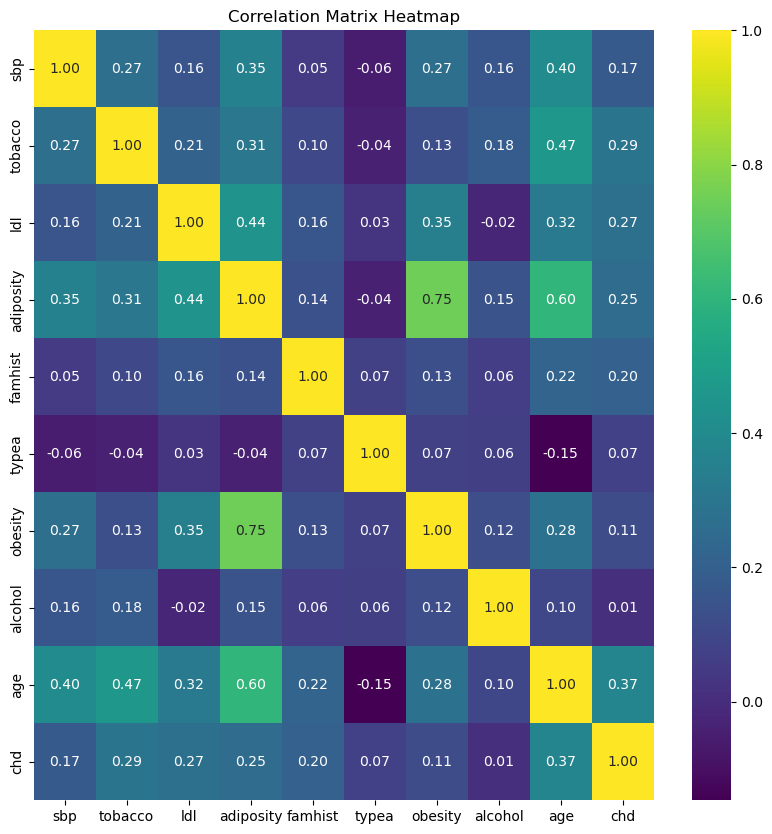

In [27]:

corr_df = train_df.copy()
corr_matrix = corr_df.corr()

# Create a figure using Seaborn
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis')

# Customize the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()


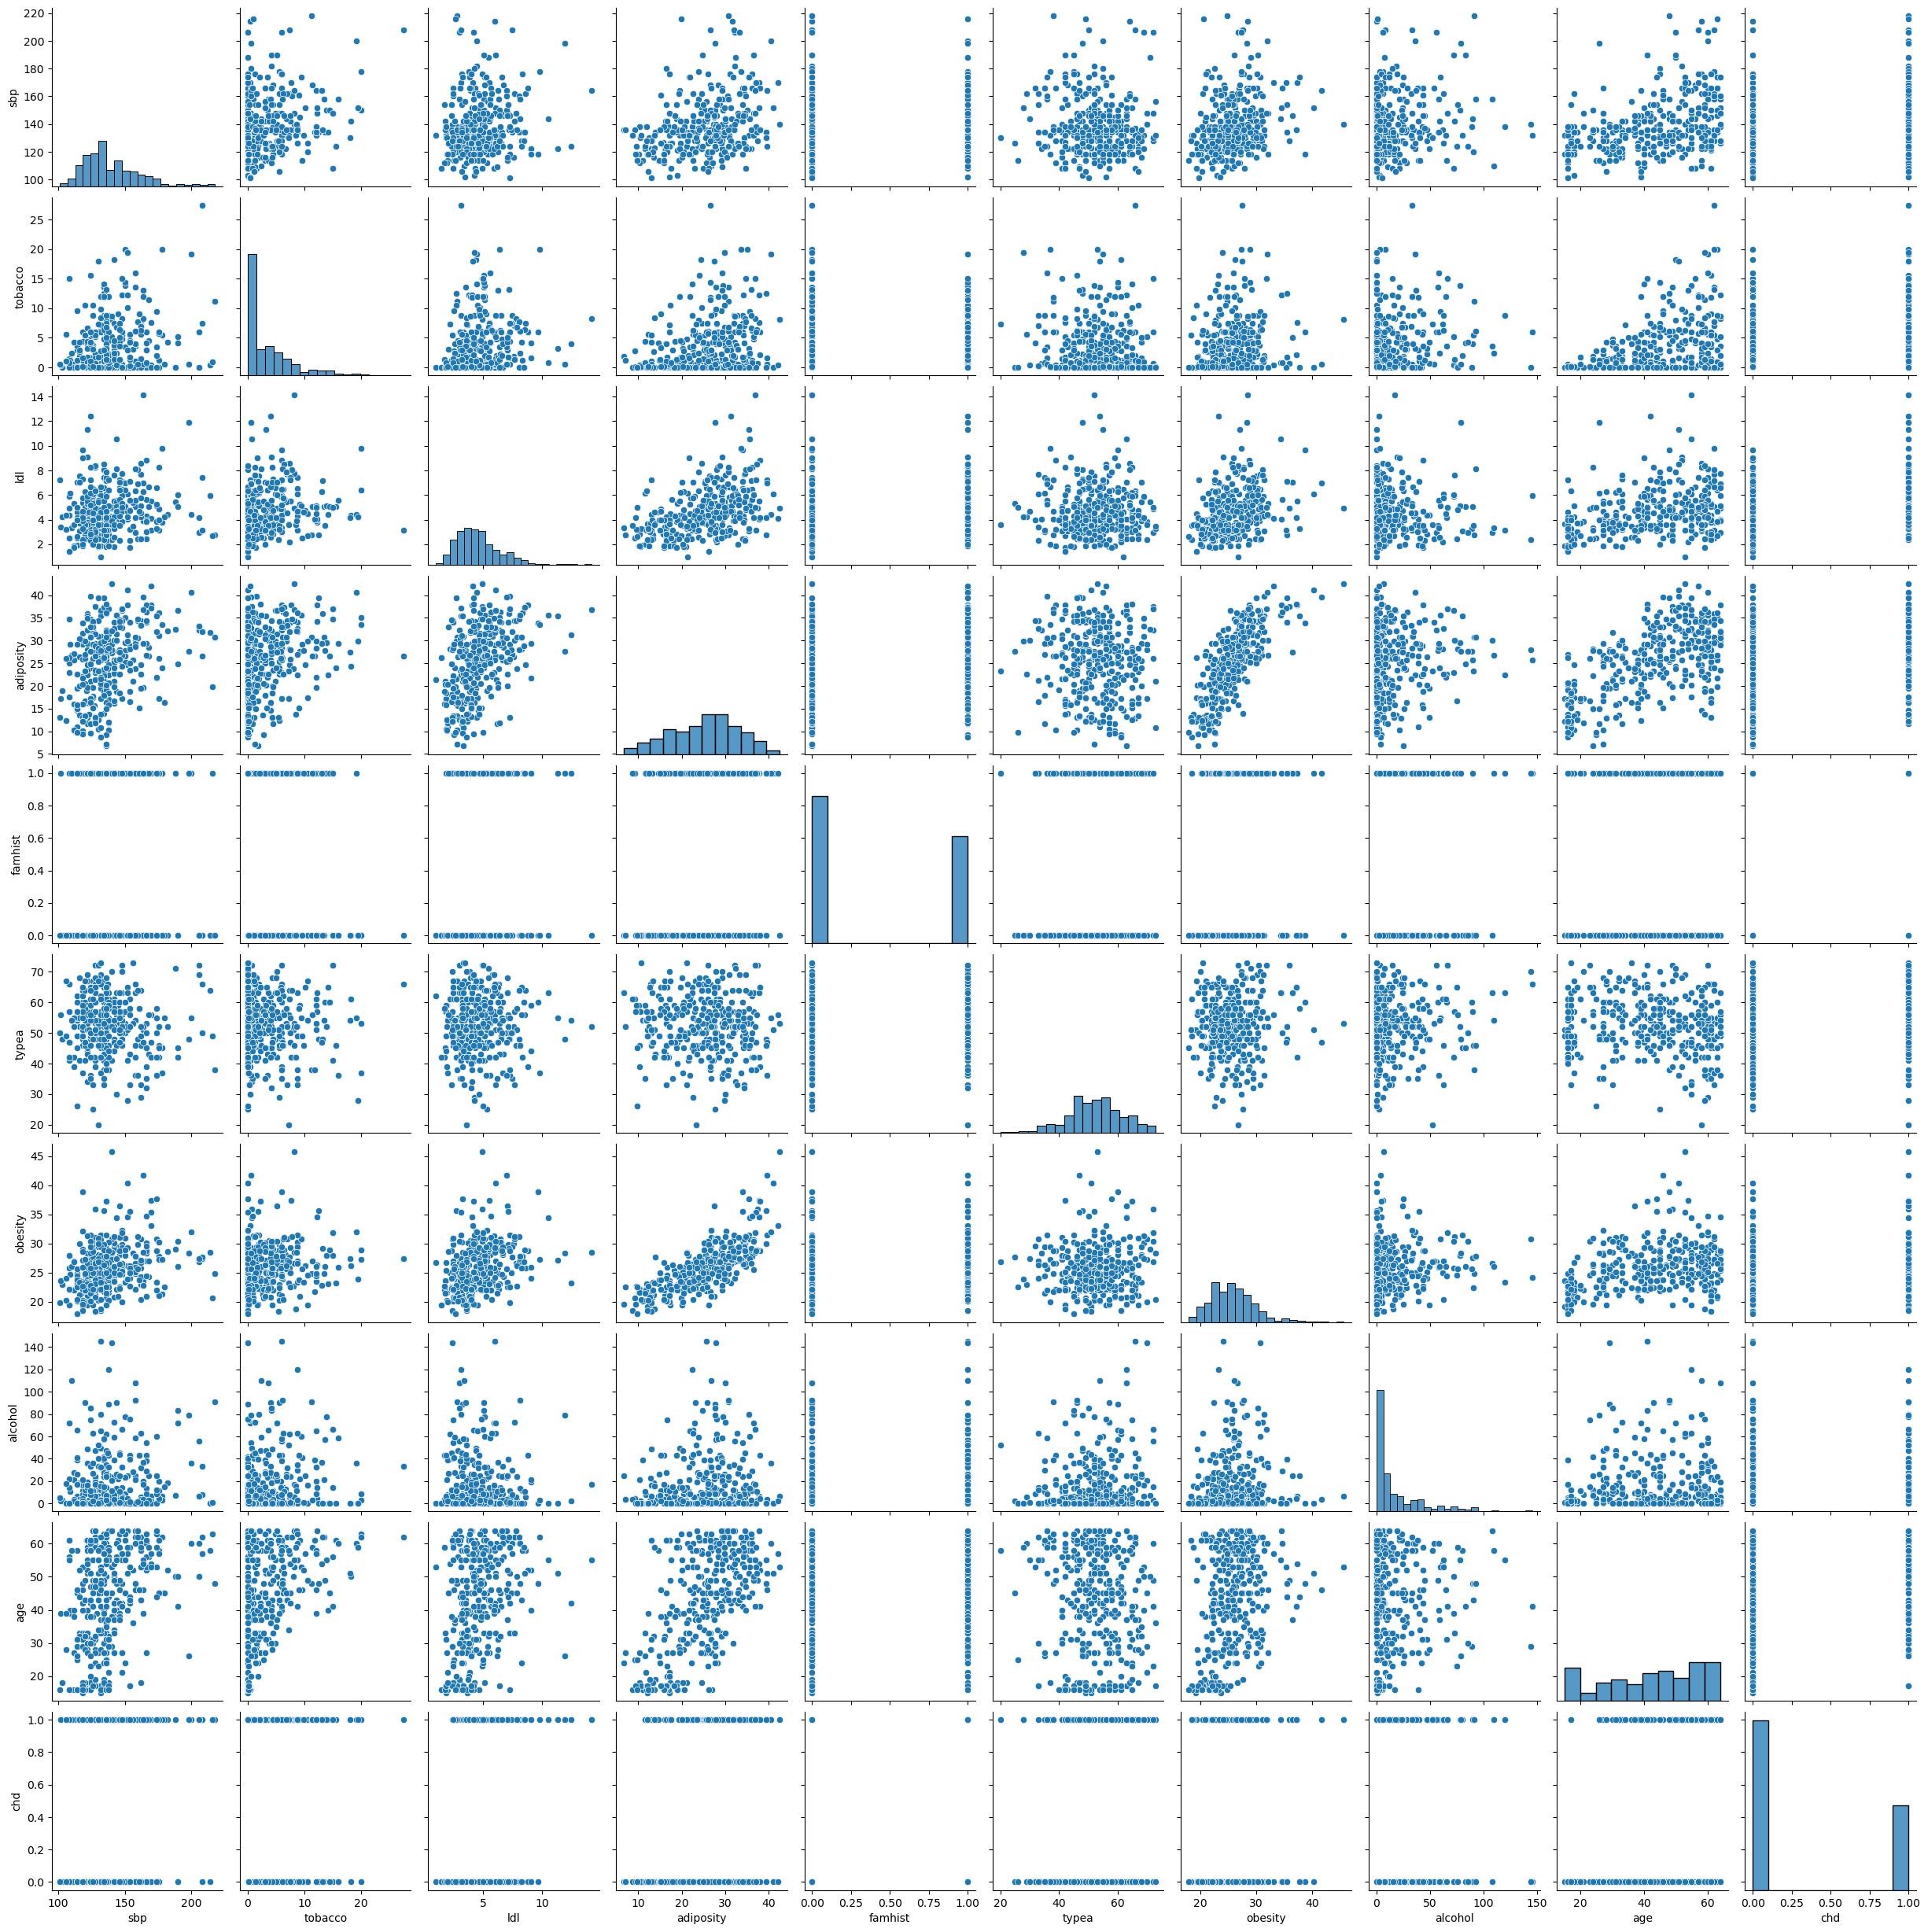

In [28]:
sns.pairplot(corr_df)
plt.show()

In [29]:
# i. Find missing values

miss_df = train_df.copy()
zero_rows = miss_df[miss_df == 0]
zero_rows

sbp  tobacco  ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0    NaN      NaN  NaN        NaN      NaN    NaN      NaN      NaN  NaN  NaN
1    NaN      NaN  NaN        NaN      NaN    NaN      NaN      NaN  NaN  0.0
2    NaN      NaN  NaN        NaN      0.0    NaN      NaN      NaN  NaN  0.0
3    NaN      NaN  NaN        NaN      NaN    NaN      NaN      NaN  NaN  NaN
4    NaN      0.0  NaN        NaN      NaN    NaN      NaN      NaN  NaN  0.0
..   ...      ...  ...        ...      ...    ...      ...      ...  ...  ...
407  NaN      NaN  NaN        NaN      0.0    NaN      NaN      NaN  NaN  0.0
408  NaN      0.0  NaN        NaN      0.0    NaN      NaN      NaN  NaN  NaN
409  NaN      NaN  NaN        NaN      0.0    NaN      NaN      NaN  NaN  0.0
410  NaN      NaN  NaN        NaN      NaN    NaN      NaN      NaN  NaN  NaN
411  NaN      NaN  NaN        NaN      0.0    NaN      NaN      NaN  NaN  0.0

[412 rows x 10 columns]

In [30]:
# ii. Get the count of missing values
train_df.isnull()


sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0    False    False  False      False    False  False    False    False   
1    False    False  False      False    False  False    False    False   
2    False    False  False      False    False  False    False    False   
3    False    False  False      False    False  False    False    False   
4    False    False  False      False    False  False    False    False   
..     ...      ...    ...        ...      ...    ...      ...      ...   
407  False    False  False      False    False  False    False    False   
408  False    False  False      False    False  False    False    False   
409  False    False  False      False    False  False    False    False   
410  False    False  False      False    False  False    False    False   
411  False    False  False      False    False  False    False    False   

       age    chd  
0    False  False  
1    False  False  
2    False  False  
3    False  False  
4    False  False  
..     ...    ...  
407  False  False  
408  False  False  
409  False  False  
410  False  False  
411  False  False  

[412 rows x 10 columns]

In [31]:
train_df.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [32]:
zero_rows.count()

sbp            0
tobacco      101
ldl            0
adiposity      0
famhist      239
typea          0
obesity        0
alcohol      101
age            0
chd          275
dtype: int64

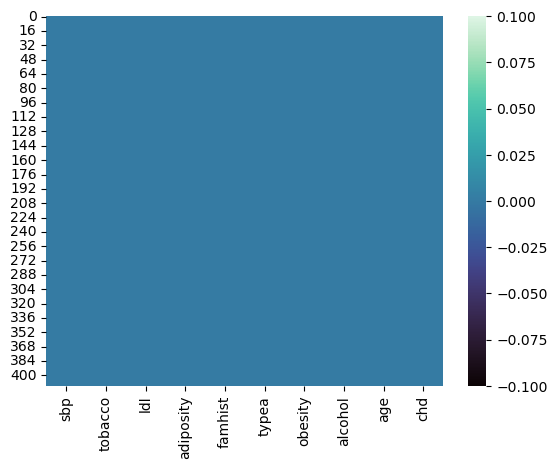

In [33]:
# iii. Plot a heat map for missing values

sns.heatmap(train_df.isnull(), cmap='mako')
plt.show()

# j. Check for missing values and What additional techniques to handle null values, excluding the drop na feature?

- As it can be seen in the distributions there are some outliers which makes 'Mean' a bad option for filling null values and there are some peaks in the distribution so 'Mode' can not be used, so 'Median' will be the best option to fill the missing values here.

# k. Applying the feature scaling technique if you think it is required. (Optional)

In [34]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
df = pd.read_csv('heart-train.csv')

In [35]:
# Convert all columns to float64 except 'famhist'
df = df.astype({'sbp': 'float64', 'tobacco': 'float64', 'ldl': 'float64', 'adiposity': 'float64', 
                'typea': 'float64', 'obesity': 'float64',
                'alcohol': 'float64', 'age': 'float64','chd': 'float64'})


In [36]:





from sklearn.preprocessing import PolynomialFeatures


# Create a new interaction feature between 'adiposity' and 'obesity'
df['adiposity_obesity_interaction'] = df['adiposity'] * df['obesity']

# Generate polynomial features for 'adiposity' and 'obesity'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['adiposity', 'obesity']])
poly_columns = poly.get_feature_names(['adiposity1', 'obesity1'])
data_poly1 = pd.DataFrame(poly_features, columns=poly_columns)

# Create a new interaction feature between 'age' and 'tobacco'
df['age_tobacco_interaction'] = df['age'] * df['tobacco']

# Generate polynomial features for 'age' and 'tobacco'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'tobacco']])
poly_columns = poly.get_feature_names(['age2', 'tobacco2'])
data_poly2 = pd.DataFrame(poly_features, columns=poly_columns)

# Create a new interaction feature between 'age' and 'obesity'
df['age_obesity_interaction'] = df['age'] * df['obesity']

# Generate polynomial features for 'age' and 'obesity'
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['age', 'obesity']])
poly_columns = poly.get_feature_names(['age3', 'obesity3'])
data_poly3 = pd.DataFrame(poly_features, columns=poly_columns)

# Concatenate the generated features to the original DataFrame
df = pd.concat([df, data_poly1, data_poly2, data_poly3], axis=1)




/Users/anshulyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/anshulyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/anshulyadav/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [37]:
df.dtypes

sbp                              float64
tobacco                          float64
ldl                              float64
adiposity                        float64
famhist                           object
typea                            float64
obesity                          float64
alcohol                          float64
age                              float64
chd                              float64
adiposity_obesity_interaction    float64
age_tobacco_interaction          float64
age_obesity_interaction          float64
adiposity1                       float64
obesity1                         float64
adiposity1^2                     float64
adiposity1 obesity1              float64
obesity1^2                       float64
age2                             float64
tobacco2                         float64
age2^2                           float64
age2 tobacco2                    float64
tobacco2^2                       float64
age3                             float64
obesity3        

In [38]:
df

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol   age  \
0    134.0    13.60  3.50      27.78  Present   60.0    25.99    57.34  49.0   
1    132.0     6.20  6.47      36.21  Present   62.0    30.77    14.14  45.0   
2    142.0     4.05  3.38      16.20   Absent   59.0    20.81     2.62  38.0   
3    114.0     4.08  4.59      14.60  Present   62.0    23.11     6.72  58.0   
4    114.0     0.00  3.83      19.40  Present   49.0    24.86     2.49  29.0   
..     ...      ...   ...        ...      ...    ...      ...      ...   ...   
407  146.0     3.60  3.51      22.67   Absent   51.0    22.29    43.71  42.0   
408  206.0     0.00  4.17      33.23   Absent   69.0    27.36     6.17  50.0   
409  134.0     3.00  3.17      17.91   Absent   35.0    26.37    15.12  27.0   
410  148.0    15.00  4.98      36.94  Present   72.0    31.83    66.27  41.0   
411  126.0     0.21  3.95      15.11   Absent   61.0    22.17     2.42  17.0   

     chd  ...  age2  tobacco2  age2^2  age2 tobacco2  tobacco2^2  age3  \
0    1.0  ...  49.0     13.60  2401.0         666.40    184.9600  49.0   
1    0.0  ...  45.0      6.20  2025.0         279.00     38.4400  45.0   
2    0.0  ...  38.0      4.05  1444.0         153.90     16.4025  38.0   
3    1.0  ...  58.0      4.08  3364.0         236.64     16.6464  58.0   
4    0.0  ...  29.0      0.00   841.0           0.00      0.0000  29.0   
..   ...  ...   ...       ...     ...            ...         ...   ...   
407  0.0  ...  42.0      3.60  1764.0         151.20     12.9600  42.0   
408  1.0  ...  50.0      0.00  2500.0           0.00      0.0000  50.0   
409  0.0  ...  27.0      3.00   729.0          81.00      9.0000  27.0   
410  1.0  ...  41.0     15.00  1681.0         615.00    225.0000  41.0   
411  0.0  ...  17.0      0.21   289.0           3.57      0.0441  17.0   

     obesity3  age3^2  age3 obesity3  obesity3^2  
0       25.99  2401.0        1273.51    675.4801  
1       30.77  2025.0        1384.65    946.7929  
2       20.81  1444.0         790.78    433.0561  
3       23.11  3364.0        1340.38    534.0721  
4       24.86   841.0         720.94    618.0196  
..        ...     ...            ...         ...  
407     22.29  1764.0         936.18    496.8441  
408     27.36  2500.0        1368.00    748.5696  
409     26.37   729.0         711.99    695.3769  
410     31.83  1681.0        1305.03   1013.1489  
411     22.17   289.0         376.89    491.5089  

[412 rows x 28 columns]

In [39]:
df=df.drop('adiposity1', axis=1)
df=df.drop('obesity1', axis=1)
df=df.drop('age2', axis=1)
df=df.drop('tobacco2', axis=1)
df=df.drop('age2 tobacco2', axis=1)
df=df.drop('age3', axis=1)
df=df.drop('age3^2', axis=1)
df=df.drop('age3 obesity3', axis=1)
df=df.drop('obesity3^2', axis=1)

df=df.drop('adiposity1 obesity1', axis=1)
# df=df.drop('obesity', axis=1)
df=df.drop('obesity3', axis=1)

In [40]:
#onehot encoding
label_encoder = LabelEncoder()
df['famhist'] = label_encoder.fit_transform(df['famhist'])

In [41]:
df

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol   age  \
0    134.0    13.60  3.50      27.78        1   60.0    25.99    57.34  49.0   
1    132.0     6.20  6.47      36.21        1   62.0    30.77    14.14  45.0   
2    142.0     4.05  3.38      16.20        0   59.0    20.81     2.62  38.0   
3    114.0     4.08  4.59      14.60        1   62.0    23.11     6.72  58.0   
4    114.0     0.00  3.83      19.40        1   49.0    24.86     2.49  29.0   
..     ...      ...   ...        ...      ...    ...      ...      ...   ...   
407  146.0     3.60  3.51      22.67        0   51.0    22.29    43.71  42.0   
408  206.0     0.00  4.17      33.23        0   69.0    27.36     6.17  50.0   
409  134.0     3.00  3.17      17.91        0   35.0    26.37    15.12  27.0   
410  148.0    15.00  4.98      36.94        1   72.0    31.83    66.27  41.0   
411  126.0     0.21  3.95      15.11        0   61.0    22.17     2.42  17.0   

     chd  adiposity_obesity_interaction  age_tobacco_interaction  \
0    1.0                       722.0022                   666.40   
1    0.0                      1114.1817                   279.00   
2    0.0                       337.1220                   153.90   
3    1.0                       337.4060                   236.64   
4    0.0                       482.2840                     0.00   
..   ...                            ...                      ...   
407  0.0                       505.3143                   151.20   
408  1.0                       909.1728                     0.00   
409  0.0                       472.2867                    81.00   
410  1.0                      1175.8002                   615.00   
411  0.0                       334.9887                     3.57   

     age_obesity_interaction  adiposity1^2  obesity1^2  age2^2  tobacco2^2  
0                    1273.51      771.7284    675.4801  2401.0    184.9600  
1                    1384.65     1311.1641    946.7929  2025.0     38.4400  
2                     790.78      262.4400    433.0561  1444.0     16.4025  
3                    1340.38      213.1600    534.0721  3364.0     16.6464  
4                     720.94      376.3600    618.0196   841.0      0.0000  
..                       ...           ...         ...     ...         ...  
407                   936.18      513.9289    496.8441  1764.0     12.9600  
408                  1368.00     1104.2329    748.5696  2500.0      0.0000  
409                   711.99      320.7681    695.3769   729.0      9.0000  
410                  1305.03     1364.5636   1013.1489  1681.0    225.0000  
411                   376.89      228.3121    491.5089   289.0      0.0441  

[412 rows x 17 columns]

In [42]:
#standard scaler
scaler = StandardScaler()
numerical_features = ['sbp', 'tobacco', 'adiposity','typea','ldl', 'obesity','famhist',
       'alcohol', 'age', 'adiposity_obesity_interaction',
       'age_tobacco_interaction', 'age_obesity_interaction', 'adiposity1^2',
       'obesity1^2', 'age2^2', 'tobacco2^2'] 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [43]:
df

sbp   tobacco       ldl  adiposity   famhist     typea   obesity  \
0   -0.256537  2.201131 -0.579093   0.340015  1.175374  0.820793  0.046087   
1   -0.354446  0.561429  0.999471   1.430374  1.175374  1.029537  1.218579   
2    0.135101  0.085029 -0.642874  -1.157775 -0.850793  0.716420 -1.224521   
3   -1.235630  0.091677  0.000245  -1.364723  1.175374  1.029537 -0.660351   
4   -1.235630 -0.812375 -0.403697  -0.743878  1.175374 -0.327304 -0.231092   
..        ...       ...       ...        ...       ...       ...       ...   
407  0.330919 -0.014682 -0.573778  -0.320927 -0.850793 -0.118559 -0.861490   
408  3.268198 -0.812375 -0.222986   1.044933 -0.850793  1.760144  0.382136   
409 -0.256537 -0.147631 -0.754489  -0.936599 -0.850793 -1.788517  0.139298   
410  0.428829  2.511345  0.207531   1.524794  1.175374  2.073261  1.478588   
411 -0.648174 -0.765843 -0.339917  -1.298759 -0.850793  0.925165 -0.890925   

      alcohol       age  chd  adiposity_obesity_interaction  \
0    1.555708  0.417783  1.0                       0.169753   
1   -0.153951  0.153075  0.0                       1.516258   
2   -0.609861 -0.310165  0.0                      -1.151691   
3   -0.447601  1.013377  1.0                      -1.150716   
4   -0.615005 -0.905759  0.0                      -0.653293   
..        ...       ...  ...                            ...   
407  1.016295 -0.045457  0.0                      -0.574221   
408 -0.469368  0.483960  1.0                       0.812383   
409 -0.115167 -1.038113  0.0                      -0.687618   
410  1.909117 -0.111634  1.0                       1.727819   
411 -0.617776 -1.699884  0.0                      -1.159015   

     age_tobacco_interaction  age_obesity_interaction  adiposity1^2  \
0                   1.882749                 0.342056      0.207985   
1                   0.357277                 0.587860      1.621540   
2                  -0.135332                -0.725579     -1.126571   
3                   0.190475                 0.489950     -1.255706   
4                  -0.741347                -0.880042     -0.828051   
..                       ...                      ...           ...   
407                -0.145964                -0.404004     -0.467561   
408                -0.741347                 0.551036      1.079290   
409                -0.422392                -0.899836     -0.973726   
410                 1.680351                 0.411768      1.761470   
411                -0.727289                -1.640964     -1.216001   

     obesity1^2    age2^2  tobacco2^2  
0     -0.030211  0.287132    2.032340  
1      1.159592 -0.020900    0.062270  
2     -1.093326 -0.496876   -0.234040  
3     -0.650335  1.076055   -0.230761  
4     -0.282196 -0.990874   -0.454584  
..          ...       ...         ...  
407   -0.813593 -0.234721   -0.280327  
408    0.290312  0.368236   -0.454584  
409    0.057044 -1.082628   -0.333572  
410    1.450587 -0.302717    2.570707  
411   -0.836990 -1.443092   -0.453991  

[412 rows x 17 columns]

In [44]:

#outlier
numerical_features = ['sbp', 'tobacco', 'adiposity','typea','ldl', 'obesity','famhist',
       'alcohol', 'age', 'adiposity_obesity_interaction',
       'age_tobacco_interaction', 'age_obesity_interaction', 'adiposity1^2',
       'obesity1^2', 'age2^2', 'tobacco2^2'] 
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [45]:
P=13
#PCA
pca = PCA(n_components=P)  # Choose the number of components you want to keep
X = df.drop('chd', axis=1)
X_pca = pca.fit_transform(X)
#X_pca = scaler.fit_transform(X_pca)
#print(X_pca)

In [46]:
#logisitic model
y = df['chd']
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=10)

# Define the model
model = LogisticRegression()

# Define the parameters for the grid search
parameters = {'C': [0.01,0.1,1,10, 100]}

# Perform the grid search
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=10)
grid_search.fit(X_train, y_train)

# Print out the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train and evaluate the model with the best parameters
best_model = LogisticRegression(**grid_search.best_params_)
best_model.fit(X_train, y_train)
accuracy = best_model.score(X_test, y_test)


# Predict on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy}')

# Predict on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

# Additional: Generate classification report and confusion matrix
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
y_pred

Best Parameters:  {'C': 0.1}
Training Accuracy: 0.7632850241545893
Test Accuracy: 0.8155339805825242
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        80
         1.0       0.62      0.43      0.51        23

    accuracy                           0.82       103
   macro avg       0.74      0.68      0.70       103
weighted avg       0.80      0.82      0.80       103

Confusion Matrix:
[[74  6]
 [13 10]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0.])

In [47]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('logistic', best_model),
    ('random_forest', random_forest)
], voting='hard')  # 'hard' for majority class voting, or 'soft' for weighted voting


# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predict on the training set
y_train_pred = voting_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy (Voting Classifier): {train_accuracy}')

# Predict on the test set
y_test_pred = voting_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy (Voting Classifier): {test_accuracy}')

# Additional: Generate classification report and confusion matrix
y_pred = voting_classifier.predict(X_test)
print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred))

print("Confusion Matrix (Voting Classifier):")
print(confusion_matrix(y_test, y_pred))
y_pred




Training Accuracy (Voting Classifier): 0.8260869565217391
Test Accuracy (Voting Classifier): 0.8349514563106796
Classification Report (Voting Classifier):
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.90        80
         1.0       0.88      0.30      0.45        23

    accuracy                           0.83       103
   macro avg       0.85      0.65      0.68       103
weighted avg       0.84      0.83      0.80       103

Confusion Matrix (Voting Classifier):
[[79  1]
 [16  7]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

# Part 2

In [48]:
# Importing needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import scipy.stats as stats
from scipy.stats import ttest_ind

In [49]:
# 1. Load the dataset and perform initial data exploration.

df = pd.read_csv('Price.csv')
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0         3       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0         3       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [50]:
# 2. Identify the types of variables present and categorize them.

print(df.dtypes)

print("\n Nominal columns in the data are : \n")
print(list( df.select_dtypes(include=['object', 'category']).columns) )

print("\n Ordinal columns in the data are : \n")
print( " condition" )

print("\n Discrete columns in the data are : \n")
print( " bedrooms, waterfront, view, condition, yr_built, yr_renovated ,price, floors " )

print("\n Continuous columns in the data are : \n")
print( " price, sqft_living, sqft_lot, sqft_above, sqft_basement  " )


date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

 Nominal columns in the data are : 

['date', 'street', 'city', 'statezip', 'country']

 Ordinal columns in the data are : 

 condition

 Discrete columns in the data are : 

 bedrooms, waterfront, view, condition, yr_built, yr_renovated ,price, floors 

 Continuous columns in the data are : 

 price, sqft_living, sqft_lot, sqft_above, sqft_basement  


In [51]:
# 3. Obtain insights about the data.
df.select_dtypes(exclude=['object', 'category']).corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.216455  0.522814   
sqft_basement  0.210427  0.334165   0.298020     0.447206  0.034842 -0.255510   
yr_built       0.021857  0.142461   0.463498     0.287775  0.050706  0.467481   
yr_renovated  -0.028774 -0.061082  -0.215886    -0.122817 -0.022730 -0.233996   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.135648  0.228504   0.034915    0.367570       0.210427   
bedrooms        -0.003483  0.111028   0.025080    0.484705       0.334165   
bathrooms        0.076232  0.211960  -0.119994    0.689918       0.298020   
sqft_living      0.117616  0.311009  -0.062826    0.876443       0.447206   
sqft_lot         0.017241  0.073907   0.000558    0.216455       0.034842   
floors           0.022024  0.031211  -0.275013    0.522814      -0.255510   
waterfront       1.000000  0.360935   0.000352    0.078911       0.097501   
view             0.360935  1.000000   0.063077    0.174327       0.321602   
condition        0.000352  0.063077   1.000000   -0.178196       0.200632   
sqft_above       0.078911  0.174327  -0.178196    1.000000      -0.038723   
sqft_basement    0.097501  0.321602   0.200632   -0.038723       1.000000   
yr_built        -0.023563 -0.064465  -0.399698    0.408535      -0.161675   
yr_renovated     0.008625  0.022967  -0.186818   -0.160426       0.043125   

               yr_built  yr_renovated  
price          0.021857     -0.028774  
bedrooms       0.142461     -0.061082  
bathrooms      0.463498     -0.215886  
sqft_living    0.287775     -0.122817  
sqft_lot       0.050706     -0.022730  
floors         0.467481     -0.233996  
waterfront    -0.023563      0.008625  
view          -0.064465      0.022967  
condition     -0.399698     -0.186818  
sqft_above     0.408535     -0.160426  
sqft_basement -0.161675      0.043125  
yr_built       1.000000     -0.321342  
yr_renovated  -0.321342      1.000000

In [52]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [53]:
# 4. Find the number of missing values for each column.
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [54]:

# 5. Calculate summary statistics import pandas as pd

import pandas as pd
import statistics as sts

df_summary = pd.DataFrame(columns=['Feature', 'Mode', 'Mean', 'Median', 'Variance', 'Standard Deviation'])

for i in df.columns:
    if df[i].dtype in ['object', 'category']:
        mode = sts.mode(df[i])
        mean = median = variance = std_dev = 'N/A'
    else:
        mode = 'N/A'
        mean = sts.mean(df[i])
        median = sts.median(df[i])
        variance = sts.pvariance(df[i])
        std_dev = sts.pstdev(df[i])
    df_summary.loc[len(df_summary)] = [i, mode, mean, median, variance, std_dev]

df_summary

Feature                   Mode           Mean         Median  \
0            date    2014-06-23 00:00:00            N/A            N/A   
1           price                    N/A  551962.988473  460943.461539   
2        bedrooms                    N/A        3.40087            3.0   
3       bathrooms                    N/A       2.160815           2.25   
4     sqft_living                    N/A    2139.346957         1980.0   
5        sqft_lot                    N/A   14852.516087         7683.0   
6          floors                    N/A       1.512065            1.5   
7      waterfront                    N/A       0.007174            0.0   
8            view                    N/A       0.240652            0.0   
9       condition                    N/A       3.451739            3.0   
10     sqft_above                    N/A    1827.265435         1590.0   
11  sqft_basement                    N/A     312.081522            0.0   
12       yr_built                    N/A    1970.786304         1976.0   
13   yr_renovated                    N/A     808.608261            0.0   
14         street  2520 Mulberry Walk NE            N/A            N/A   
15           city                Seattle            N/A            N/A   
16       statezip               WA 98103            N/A            N/A   
17        country                    USA            N/A            N/A   

               Variance Standard Deviation  
0                   N/A                N/A  
1   317840461019.945862      563773.412835  
2              0.825825           0.908749  
3              0.614179           0.783696  
4         927565.873969         963.102214  
5     1287412824.222785       35880.535451  
6              0.289691            0.53823  
7              0.007122           0.084395  
8              0.605782            0.77832  
9               0.45854           0.677156  
10        743173.750197         862.075258  
11        215376.535311         464.086776  
12           883.790639          29.728616  
13        959044.300888         979.308073  
14                  N/A                N/A  
15                  N/A                N/A  
16                  N/A                N/A  
17                  N/A                N/A

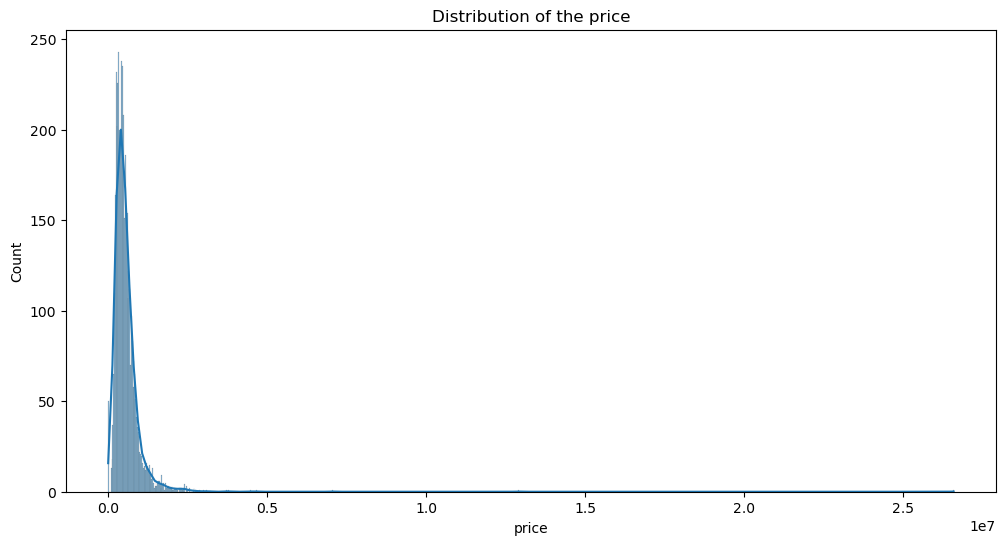

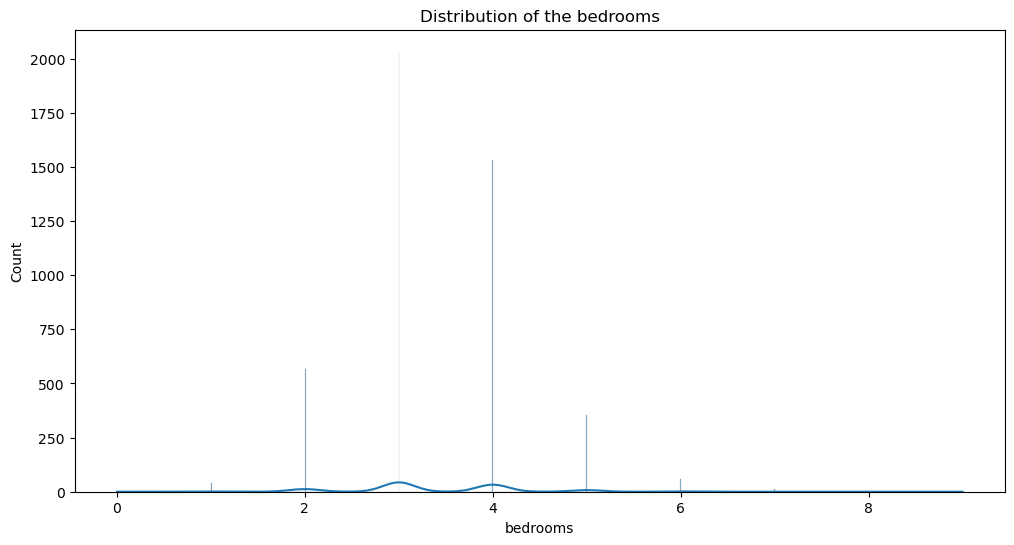

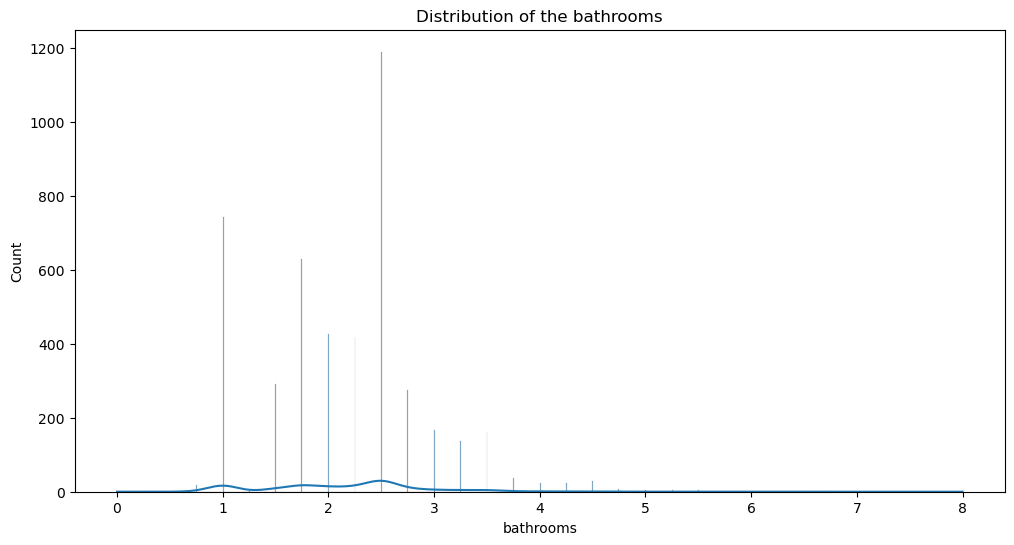

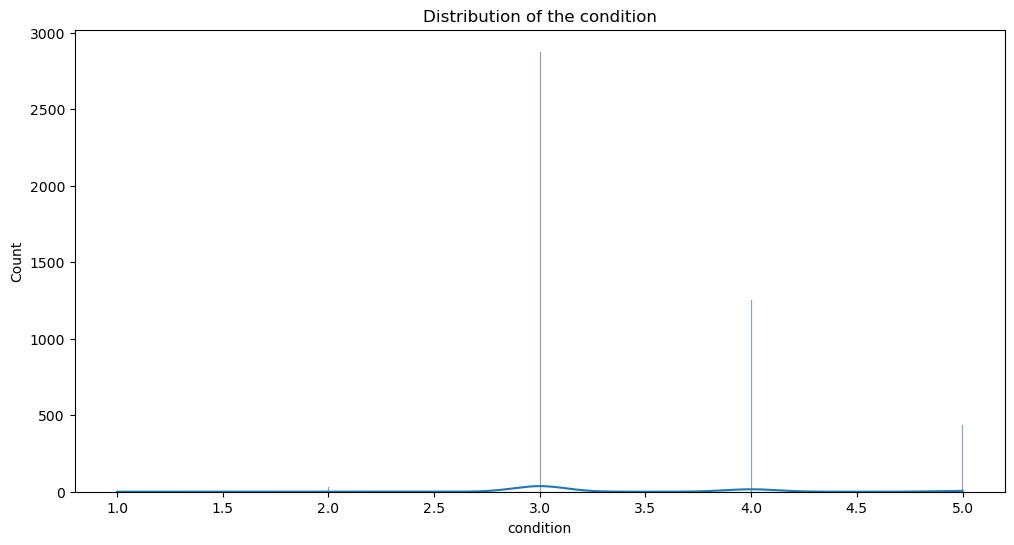

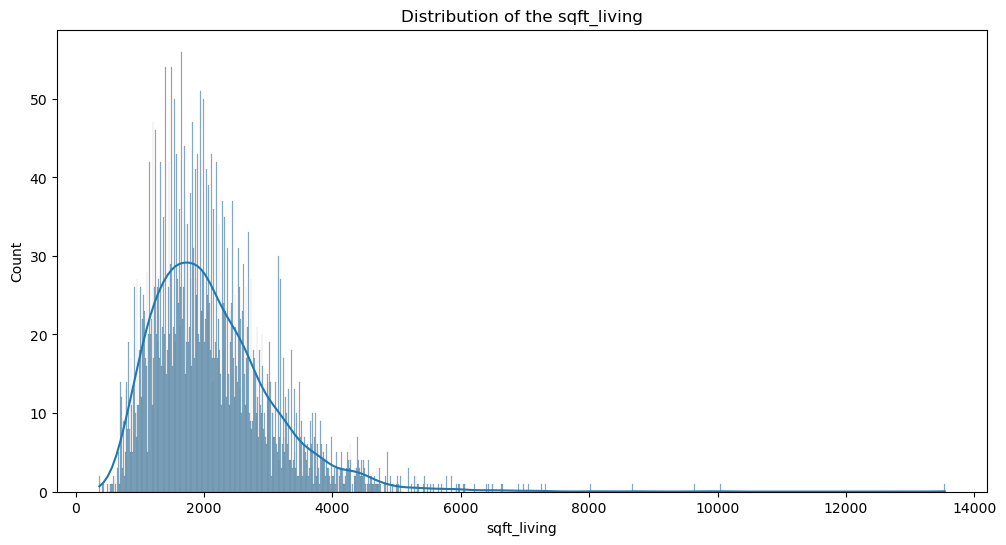

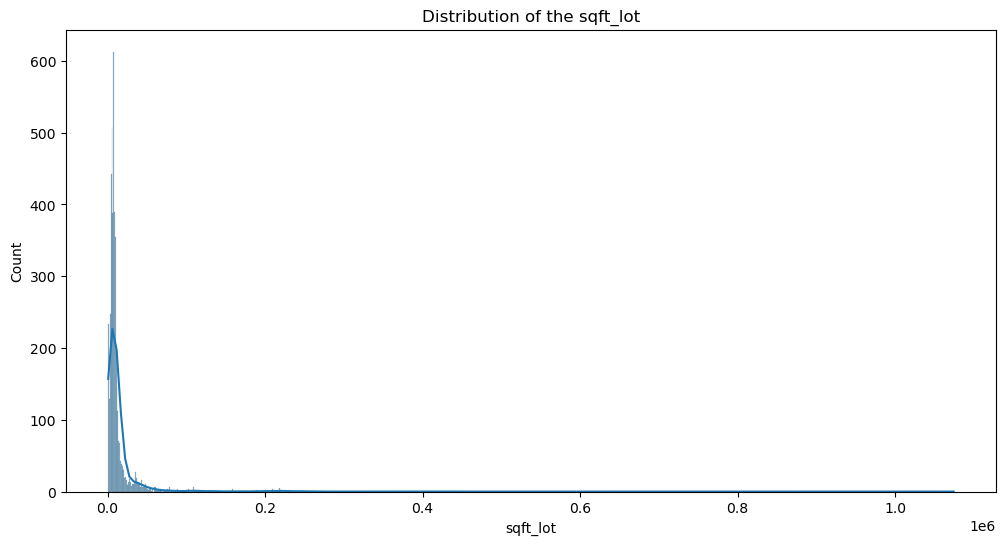

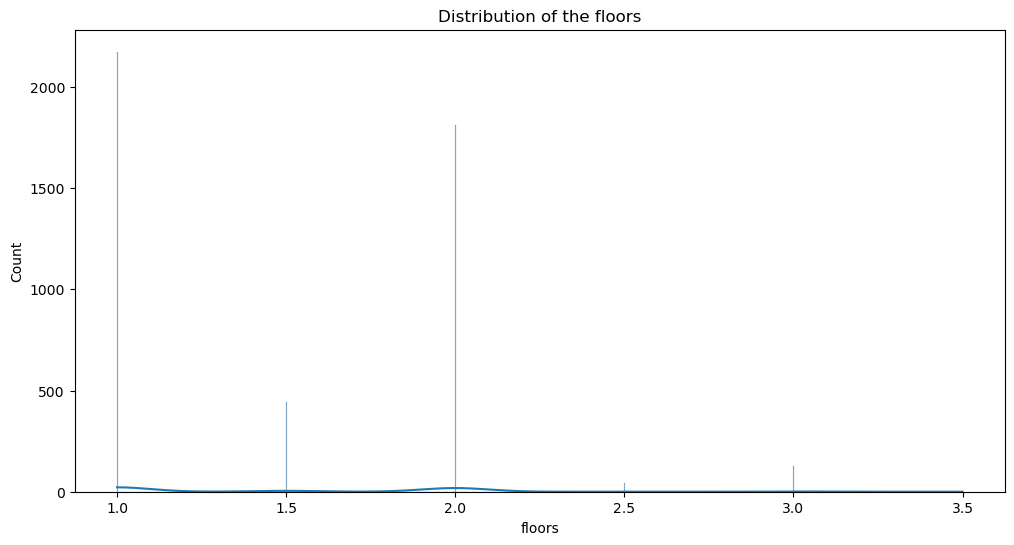

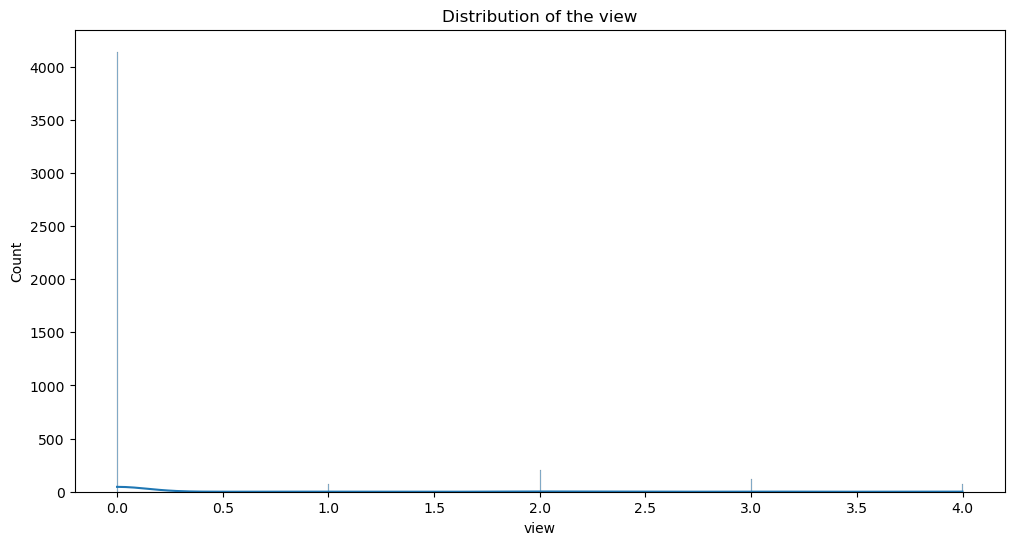

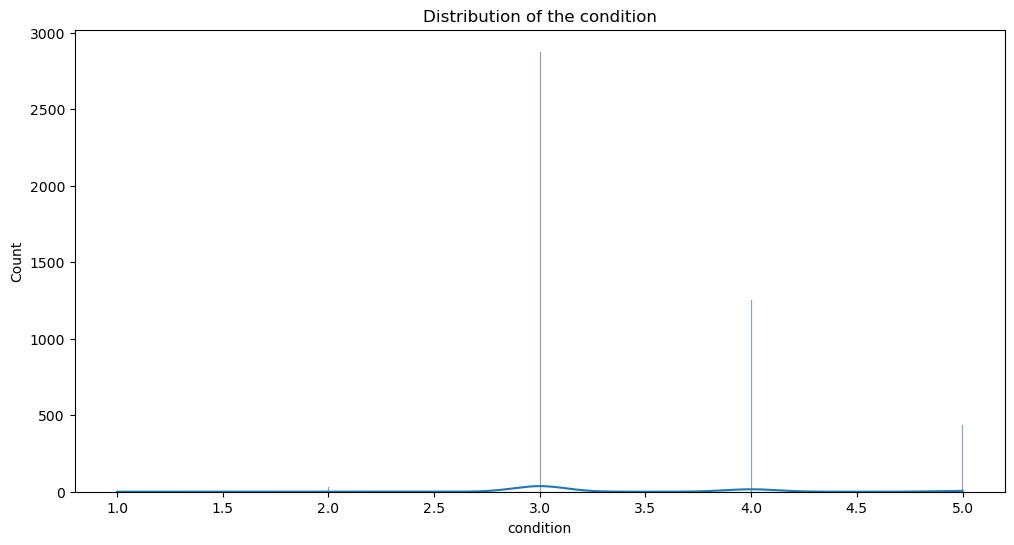

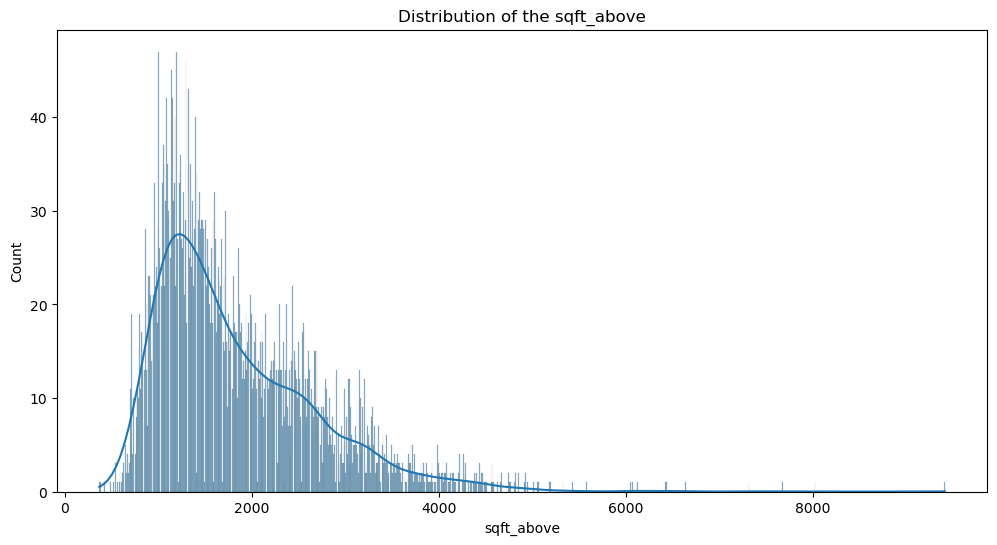

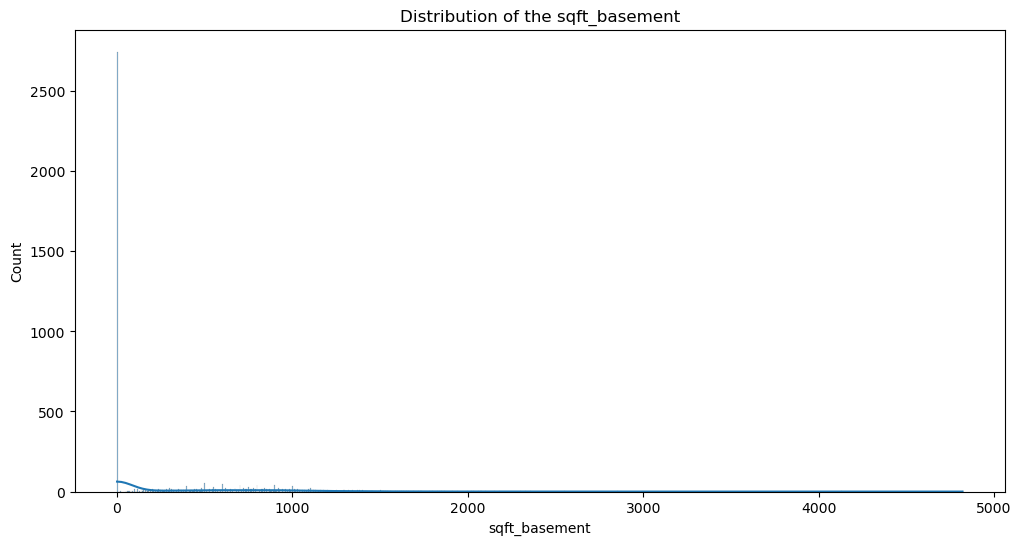

In [55]:
col = ['price', 'bedrooms', 'bathrooms','condition', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'sqft_above','sqft_basement']

for i in col :
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df[i], bins= 1000, kde=True)
    plt.title('Distribution of the '+i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

# 7. Observe the histogram, Does it look like it falls under any probability distribution? Does it look like a bell curve?
# The histogram obtained looks like a bell curve but it is skewed positively, log transformation can be performed to remove the skewness.

In [56]:
# if any 0 values exists in data
df[df == 0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [57]:
# 8. Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows the normal distribution (if the p-value is greater than 0.05 then the feature follows the Normal distribution)

price_data = df['price']

statistic, p_value = stats.shapiro(price_data)

alpha = 0.05
if p_value > alpha:
    print("The data looks like normally distributed (fail to reject H0)")
else:
    print("The data does not look like normally distributed (reject H0)")


The data does not look like normally distributed (reject H0)


In [58]:
# 9. Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a hypothesis test using a t-test: split into two groups: properties built before 1990 and those built-in or after 1990. (alpha/confidence interval= 95%)
group_before_1990 = df[df['yr_built'] < 1990]['price']
group_after_1990 = df[df['yr_built'] >= 1990]['price']

t_stat, p_value = ttest_ind(group_before_1990, group_after_1990)

alpha = 0.95

if p_value < alpha:
    print(f"P-value ({p_value}) is less than the alpha ({alpha}).\n")
    print("Reject null hypothesis: Year built has a significant impact on sale price.\n")
else:
    print(f"P-value ({p_value}) is greater than the alpha ({alpha}).\n")
    print("Fail to reject null hypothesis: No significant impact of year built on sale price.\n")


P-value (5.51579911487353e-07) is less than the alpha (0.95).

Reject null hypothesis: Year built has a significant impact on sale price.



In [59]:
# 10. Consider the Hypothesis "The year built has a significant impact on sale price.Do a Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses built in 1990, groupB has all houses that were built in 2000 and groupC has all houses built in 2010 (alpha/confidence interval = 95%)

groupA = df[df['yr_built'] == 1990]['price']
groupB = df[df['yr_built'] == 2000]['price']
groupC = df[df['yr_built'] == 2010]['price']
f_stat, p_val = stats.f_oneway(groupA, groupB, groupC)
print('F=%.3f, p=%.3f' % (f_stat, p_val))

if p_value < alpha:
    print("Reject null hypothesis: Year built has a significant impact on sale price.\n")
else:
    print("Fail to reject null hypothesis: No significant impact of year built on sale price.\n")


F=4.287, p=0.016
Reject null hypothesis: Year built has a significant impact on sale price.



# 11. Does the ANOVA conclusion change from the t-test or is it the same?
# Same as T-Test    

In [60]:
# 12. Calculate the covariance matrix of the numerical features present in the dataset.
df_num = df.select_dtypes(exclude=['object', 'category'])
cov_matrix = np.cov(df_num,rowvar=False)
print(cov_matrix)

[[ 3.17909572e+11  1.02660350e+05  1.44557386e+05  2.33751159e+08
   1.02077552e+09  4.59692113e+04  6.45547323e+03  1.00288560e+05
   1.33319640e+04  1.78683225e+08  5.50679344e+07  3.66404580e+05
  -1.58896099e+07]
 [ 1.02660350e+05  8.26004897e-01  3.88879482e-01  5.20766735e+02
   2.24444017e+03  8.70301672e-02 -2.67165830e-04  7.85469431e-02
   1.54366261e-02  3.79805727e+02  1.40961008e+02  3.84954442e+00
  -5.43710879e+01]
 [ 1.44557386e+05  3.88879482e-01  6.14312773e-01  5.74627928e+02
   3.03298755e+03  2.05223909e-01  5.04307411e-03  1.29316711e-01
  -6.36929815e-02  4.66213556e+02  1.08414371e+02  1.08010070e+01
  -1.65724334e+02]
 [ 2.33751159e+08  5.20766735e+02  5.74627928e+02  9.27767563e+05
   7.27707999e+06  1.78799031e+02  9.56198096e+00  2.33183935e+02
  -4.09821647e+01  7.27839770e+05  1.99927792e+05  8.24128442e+03
  -1.15862844e+05]
 [ 1.02077552e+09  2.24444017e+03  3.03298755e+03  7.27707999e+06
   1.28769276e+09  7.24308235e+01  5.22193888e+01  2.06440850e+03


Text(0.5, 1.0, 'Heatmap for Covariance Matrix')

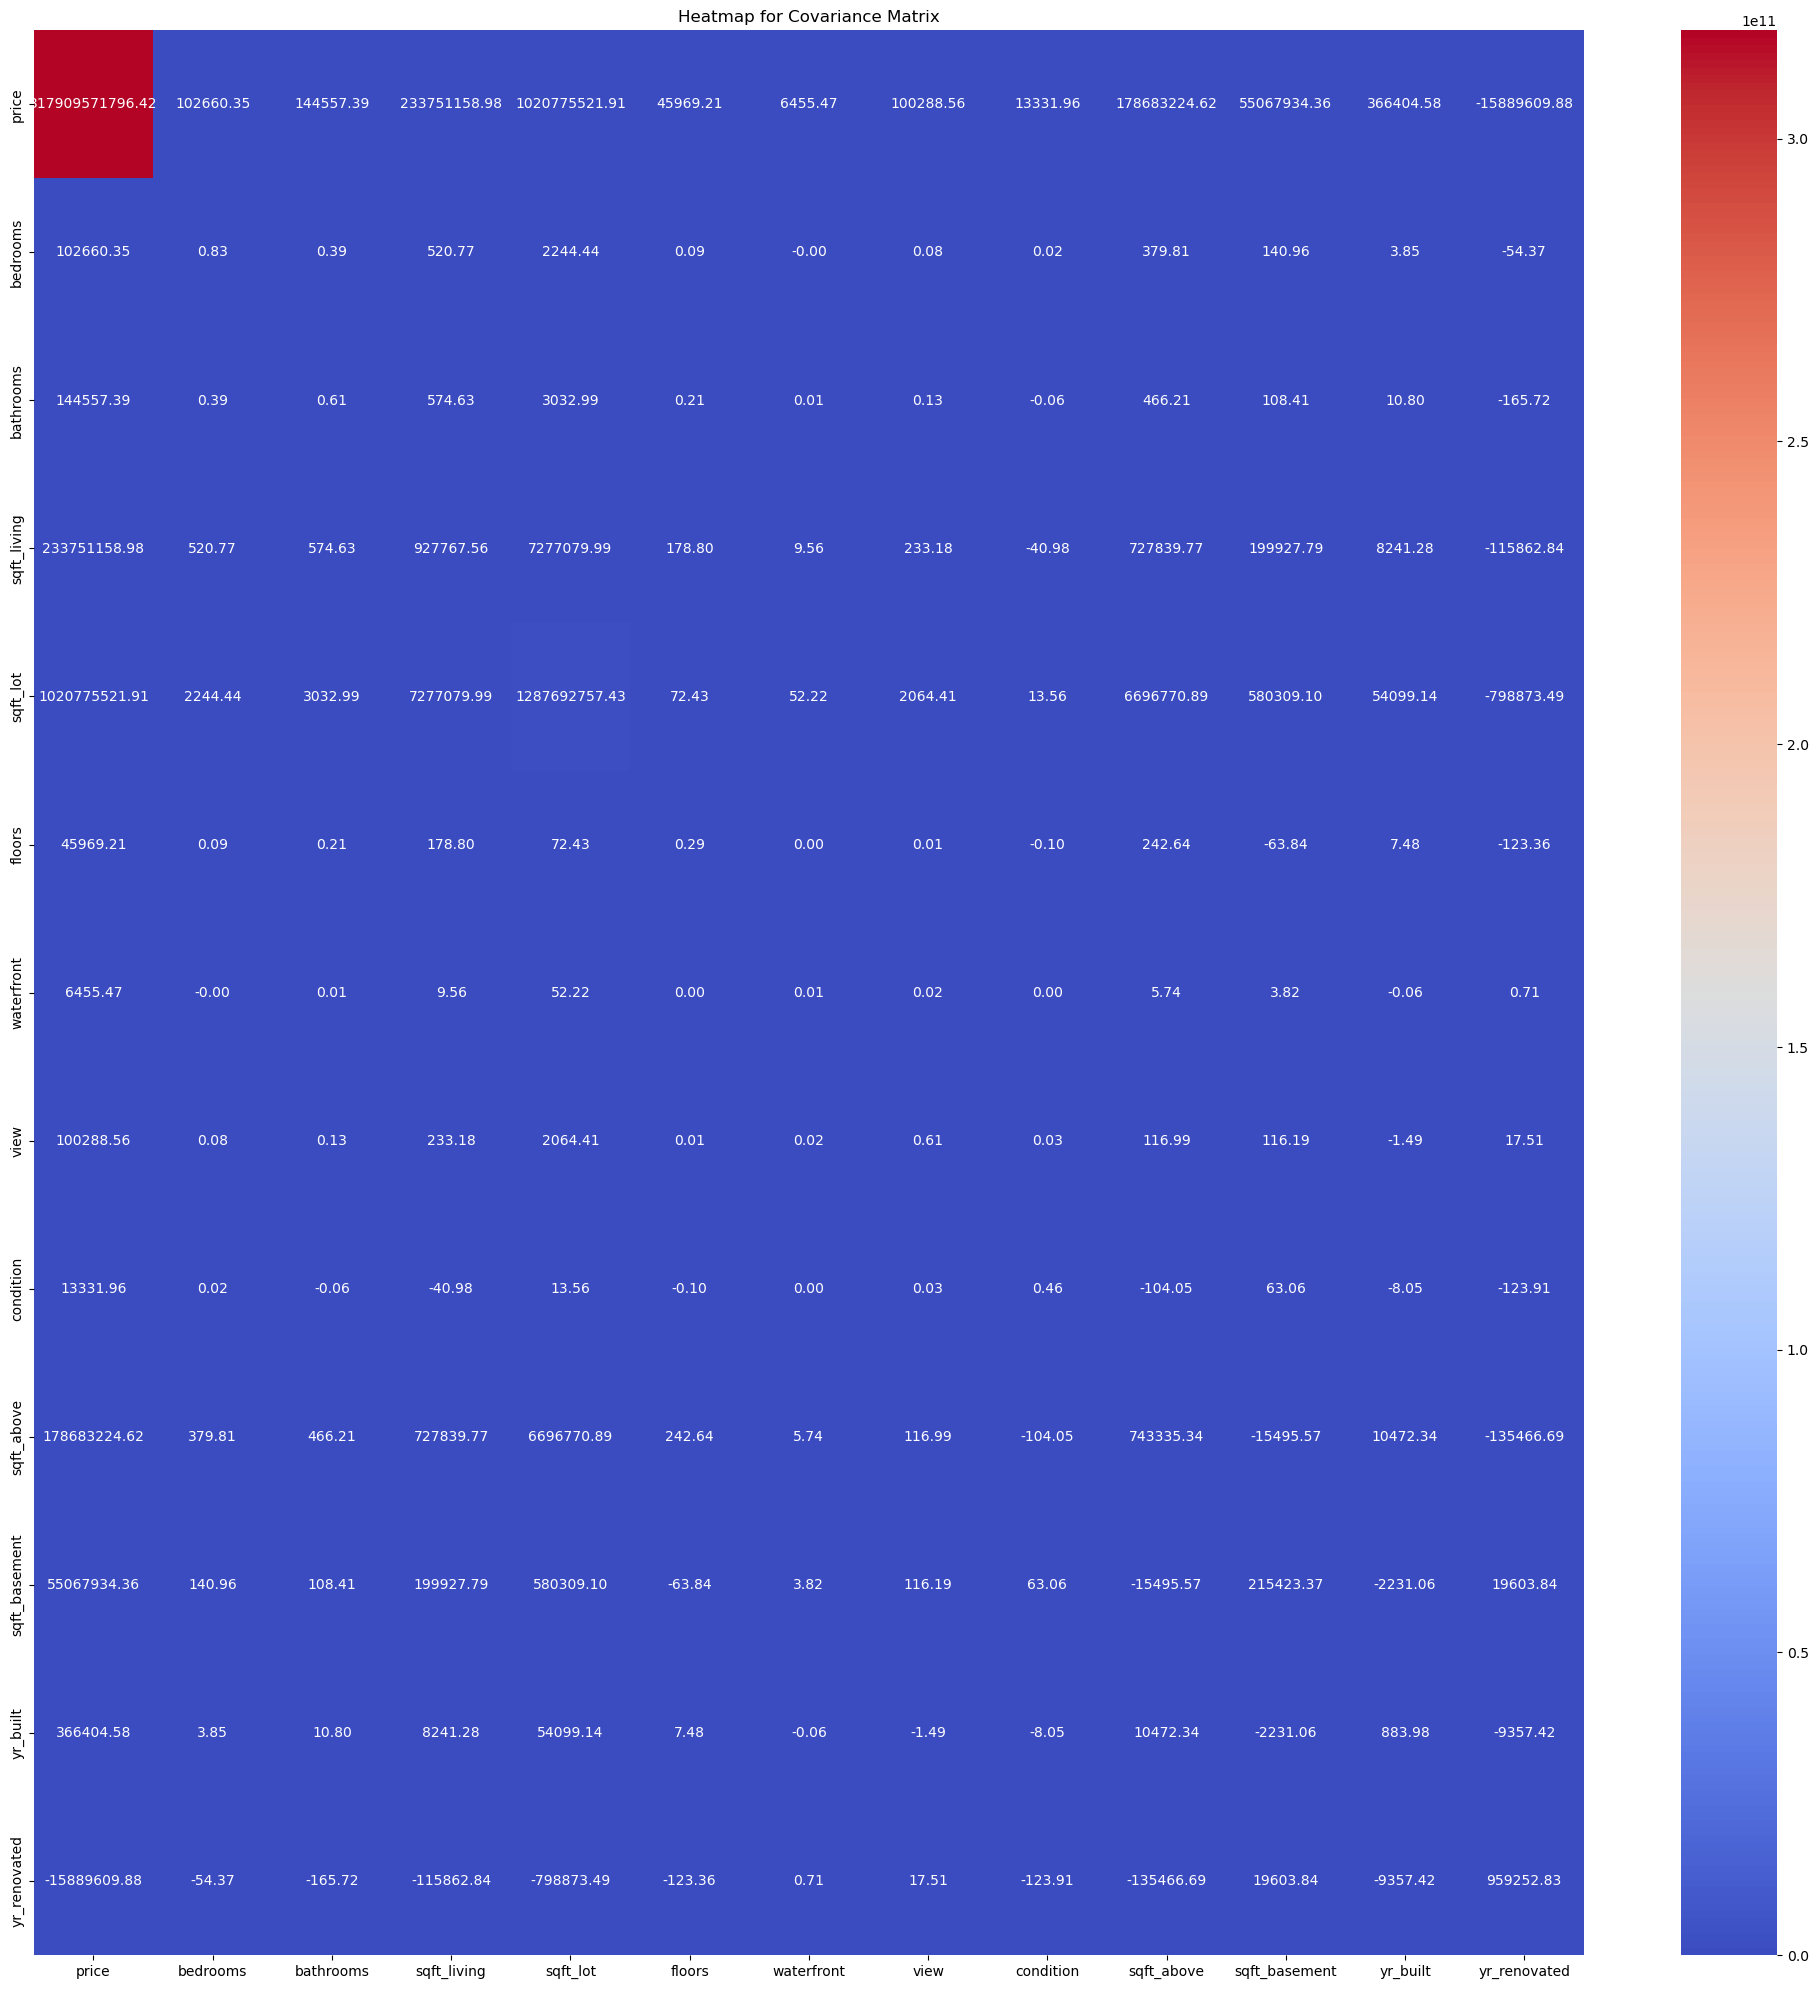

In [61]:
# 13. Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?

plt.figure(figsize=(25, 25))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=df_num.columns, yticklabels=df_num.columns)
plt.title('Heatmap for Covariance Matrix')

In [62]:
# 14. Compute the eigenvalue, eigenvector, and Rank of the covariance matrix.
cov_w,cov_v = np.linalg.eig(cov_matrix)


In [63]:
cov_w

array([3.17913145e+11, 1.28446478e+09, 1.31108057e+06, 8.93134507e+05,
       2.96182598e+05, 6.50782442e+02, 5.84849779e-01, 4.71240315e-01,
       3.29071200e-01, 2.33658678e-01, 1.27738313e-01, 6.13485190e-03,
       1.37546094e-09])

In [64]:
cov_v

array([[ 9.99994359e-01, -3.23035786e-03, -8.51596811e-04,
        -3.31278978e-04,  1.12866961e-04, -5.91081399e-06,
        -1.71362135e-07,  5.41664503e-08, -2.44755590e-08,
        -7.55431136e-08, -2.40552686e-09,  8.71000624e-09,
        -1.30394454e-16],
       [ 3.22942387e-07,  1.49266766e-06,  3.91643641e-04,
         2.02274365e-04, -3.14760225e-04,  4.68120278e-04,
        -7.72572256e-01, -5.78876712e-01, -8.93143609e-02,
        -2.29457289e-01, -8.58296949e-02, -6.23757807e-03,
        -1.14564397e-09],
       [ 4.54737600e-07,  2.00176882e-06,  4.61433393e-04,
         1.09888047e-04, -1.54417958e-04, -7.06651255e-03,
        -1.35584993e-01, -1.90062188e-01, -1.26186318e-01,
         7.66160713e-01,  5.85249292e-01,  9.67196831e-04,
         3.84642669e-10],
       [ 7.35340568e-04,  5.08389398e-03,  6.75592283e-01,
         3.22262450e-01, -3.26122959e-01,  2.38598818e-03,
         2.57072622e-04,  4.99428800e-04,  4.01236872e-05,
        -1.85297908e-04, -1.77420077e

# 15. Interpret the Eigenvectors in the context of the dataset. What do they represent and their significance?


- The eigen vectors of a covariance matrix give the direction in which the data is highly spread.
- The eigen values reprsent the amount of variance that is there in the data in the direction of the corresponding eigenvector.

In [65]:
# 16. Calculate the inverse of the covariance matrix

print(np.linalg.inv(cov_matrix))

[[ 4.02141066e-12  2.33410076e-07 -2.30022634e-07 -4.61727395e-09
   2.77979084e-12 -1.60085132e-07 -1.42898246e-06 -1.83773134e-07
  -1.28056491e-07  1.53586923e-09  9.78952536e-10  9.56375963e-09
  -2.64315884e-11]
 [ 2.33410076e-07  2.04523258e+00 -6.99779967e-01 -2.84213408e-02
   2.40928235e-06  1.38457162e-01  1.01201095e+00  1.98099815e-01
  -1.48232089e-01  1.78702221e-02  1.68687134e-02  4.26866088e-03
  -6.54008976e-05]
 [-2.30022634e-07 -6.99779967e-01  5.35024413e+00 -4.56431370e-03
   2.24562713e-06 -1.72051984e+00 -1.48096924e-01 -7.26987962e-02
  -1.67390565e-01  1.44961471e-02  1.03830044e-02 -3.24484850e-02
   1.05411176e-04]
 [-2.13855968e-09 -6.57175507e-03 -5.62606570e-03  1.71798692e+10
  -3.56813758e-07 -1.22444509e-02  2.12105346e-02 -5.00152600e-03
  -1.38941138e-02 -1.71798692e+10 -1.71798692e+10 -6.39998109e-05
  -5.98809009e-06]
 [ 2.77979084e-12  2.40928235e-06  2.24562713e-06 -2.71380791e-08
   8.36481320e-10  7.33468811e-06  5.28210596e-06 -1.21679542e-06


In [66]:
# 17. Discuss the impact of the matrix rank on the feasibility of solving a linear regression problem using these features.
np.linalg.matrix_rank(df_num)

12

- The rank of the matrix with all the numarical features is less than the total number features, this show that these numarical features can be derived from the combination of the remaining features which makes them linearly dependent and it will be difficult to solve the regression problem, rather PCA or regularisation can be used.


# 18. How does the rank relate to multicollinearity among the independent variables? Provide examples from the dataset.

In [67]:

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the independent variables for which you want to calculate VIF
independent_variables = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(independent_variables)

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif)


         Variable          VIF
0           const  8750.180396
1           price     1.278445
2        bedrooms     1.689372
3       bathrooms     3.286723
4     sqft_living          inf
5        sqft_lot     1.077131
6          floors     1.871729
7      waterfront     1.159469
8            view     1.349458
9       condition     1.441821
10     sqft_above          inf
11  sqft_basement          inf
12       yr_built     1.923455
13   yr_renovated     1.319624


/Users/anshulyadav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


- This code is calculating the VIF for the specified independent variables. A high VIF value (typically greater than 5) indicates high multicollinearity, and you may need to consider addressing it by removing or combining variables or using other techniques in your regression analysis.

In [68]:
# 19. Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built'] and Y with the target feature and Print matrix X and Y

df_new = df.copy()
X = df_new[['bedrooms', 'sqft_lot', 'floors', 'yr_built']]
Y = df_new['price']

In [69]:
X

bedrooms  sqft_lot  floors  yr_built
0            3      7912     1.5      1955
1            5      9050     2.0      1921
2            3     11947     1.0      1966
3            3      8030     1.0      1963
4            4     10500     1.0      1976
...        ...       ...     ...       ...
4595         3      6360     1.0      1954
4596         3      7573     2.0      1983
4597         3      7014     2.0      2009
4598         4      6630     1.0      1974
4599         3      8102     2.0      1990

[4600 rows x 4 columns]

In [70]:
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [71]:
# 20. Compute the transpose of matrix X and print the transpose matrix.
X_transpose = np.transpose(X)

X_transpose

0       1        2       3        4       5       6        7     \
bedrooms     3.0     5.0      3.0     3.0      4.0     2.0     2.0      4.0   
sqft_lot  7912.0  9050.0  11947.0  8030.0  10500.0  6380.0  2560.0  35868.0   
floors       1.5     2.0      1.0     1.0      1.0     1.0     1.0      2.0   
yr_built  1955.0  1921.0   1966.0  1963.0   1976.0  1938.0  1976.0   1989.0   

             8       9     ...    4590    4591    4592    4593    4594  \
bedrooms      3.0     4.0  ...     4.0     3.0     4.0     3.0     3.0   
sqft_lot  88426.0  6200.0  ...  8331.0  5752.0  8169.0  4600.0  7223.0   
floors        1.0     1.5  ...     2.0     1.0     2.0     2.0     2.0   
yr_built   1985.0  1945.0  ...  1991.0  1945.0  1993.0  2013.0  1994.0   

            4595    4596    4597    4598    4599  
bedrooms     3.0     3.0     3.0     4.0     3.0  
sqft_lot  6360.0  7573.0  7014.0  6630.0  8102.0  
floors       1.0     2.0     2.0     1.0     2.0  
yr_built  1954.0  1983.0  2009.0  1974.0  1990.0  

[4 rows x 4600 columns]

In [72]:
# 21. solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients

a = np.linalg.lstsq(X, Y, rcond=None)
a

(array([ 1.11398600e+05,  5.98070191e-01,  1.28189372e+05, -1.52885306e+01]),
 array([1.38092824e+15]),
 4,
 array([2.63428838e+06, 1.23456500e+05, 6.14645869e+01, 3.51814980e+01]))

In [73]:
import pandas as pd
import plotly.express as px

Feat_x = df['bedrooms']
T_var = df['price']

# Create an interactive scatter plot with regression line
fig = px.scatter(x=Feat_x, y=T_var, title='Interactive Scatter Plot with Regression Line')
fig.update_traces(marker=dict(size=12), selector=dict(mode='markers'))

fig.add_traces(px.scatter(df, x=Feat_x, y=T_var, trendline='ols').data[1])

# Customize axis labels
fig.update_xaxes(title_text='Number of Bedrooms', nticks=5)
fig.update_yaxes(title_text='Price')

# Customize layout for a futuristic look
fig.update_layout(
    autosize=False,
    margin=dict(l=0, r=0, b=0, t=30),
    hovermode='x',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white'),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

# Show the interactive plot
fig.show()

- From above visualizations we can see that number of bedroom features don't have significant impact on price. But flat with 3 bedroom has the highest price matybe it is because of some other reason, and flat having 5 bedroom is the peak of a bell curve , after which the price again start to decline irrespective of increase in number of bedrooms. 
- It is strange the flat having zero bedroom is more expensive from the flat having 1 bedroom , and expenisve from most of the flat having 2 and 3 bedroom goes up to flat having 8 bedroom. 
